# install

In [ ]:
!pip install colorama

# import

In [ ]:
import re
import random
import numpy as np
import pandas as pd
from colorama import Fore, Back, Style
from itertools import cycle, islice, dropwhile
import collections

# Definitions Theory

* **Search space $S .$**

 A typically finite set, in which certain solution (e. g., of optimal quality) are sought. Examples:
  - $\{0,1\}^{n}$, all bit strings of length $n$. In this way, an assignment of truth values to $n$ boolean variables can be coded.
  - $\Pi_{n}:=$ set of all permutations on $\{1, \ldots, n\} .$ In this way, a solution to the TSP can be coded.

* **Fitness function $f$.**

 Maps $x \in S \mapsto f(x) \in \mathbb{R},$ i. e., returns a value for every search point. Examples:
  - $f:\{0,1\}^{n} \rightarrow \mathbb{R}$ returns the number of satisfied clauses w. r. t. the MAX-3-SAT problem, using the search space $\{0,1\}^{n}$ as described above.
  - $f: \Pi_{n} \rightarrow \mathbb{R}$ returns the length of a TSP-tour.

# Mutations Theory
* **Bit-flip mutation** 
  * Given $x=\left(x_{1}, \ldots, x_{n}\right) \in\{0,1\}^{n},$ 
  * an index $k \in\{1, \ldots, n\}$ is picked uniformly at random.
  * $x^{\prime}$ is obtained by flipping bit $k$ in $x,$ formally
$$
x^{\prime}=\left(x_{1}, \ldots, x_{k-1}, 1-x_{k}, x_{k+1}, \ldots, x_{n}\right)
$$
* **Swap mutation** : not great for TSP
  * Given $x=\left(i_{1}, \ldots, i_{n}\right) \in \Pi_{n},$ 
  * two indices $k<\ell \in\{1, \ldots, n\}$ are picked
u. a. r. and 
  * $x^{\prime}$ is obtained by swapping the elements at these two places. 
  $$x^{\prime}=\left(i_{1}, \ldots, i_{k-1}, i_{\ell}, i_{k+1}, \ldots, i_{\ell-1}, i_{k}, i_{\ell+1}, \ldots, i_{n}\right)$$
* **Jump**  : better then swap for TSP 
  * Pick two indices $k<\ell$ 
  * let element at pos. $k$ jump to pos. $\ell,$ 
  * shift intermediate values to the left: 
  > (1,3,4,6,2,5)$\mapsto$(1,4,6,2,3,5) for $k=2, \ell=5$
* **2-OPT**: very good for TSP , see chapter TSP
  * Pick two edges
  * connect their endpoints "crossing over"

# Cross over Theory 


* **Order Crossover** $(\mathrm{OX}):$ Choose $k, \ell \in\{1, \ldots, n\},$ where $k<\ell,$ u. a. r. Take $\left(x_{k}, \ldots, x_{\ell}\right)$ from the first parent. Remaining positions, starting from $\ell+1,$ filled consecutively from second parent (also from $\ell+1$ ), skipping any occurrences of elements from $x_{k}, \ldots, x_{\ell}$. If an element of y is already present in x, then take the index of the position where it appears in x, move to y with the index and take that value.

* **Partially Matched Crossover (PMX)** Starts out as OX (take $\left(x_{k}, \ldots, x_{\ell}\right)$ from first parent). Remaining elements added from second parent by preserving absolute positions as far as possible. Elements $j$ from the second parent that cannot be put at the same position are filled with the elements that stand at the same position in $y$ as $j$ in $x$ (repeating the procedure until a valid element is found).

* **Cycle Crossover** $(\mathrm{CX})$ : tries to maintain many absolute positions of the first parent by identifying a "cycle" through the parents. Consider the two parents to define a mapping $f$ on the indices: $f\left(x_{i}\right):=y_{i}$ for $i \in\{1, \ldots, n\}$ 
Start by copying $x_{1}$ to $z_{1} .$ Then the element of $x$ that equals $y_{1}=f\left(x_{1}\right),$ say $x_{j},$ is copied to $z$ at the same position $j$. Proceed by finding the element of $x$ equaling $f\left(x_{j}\right)$ etc. until we hit an element that has already been copied to $z$. The remaining positions are filled with the missing elements according to the order in $y$.


# Best Crossover Operations

* **Partition Crossover (PX)**  PX can be implemented to run in time O(n).
  * Step 1: take the union of the tours given by the parents. Find edges common to both tours.
  * Find a cut through exactly two common edges. 
    * These edges are called cut edges. 
    * If impossible: crossover not feasible, return parents.
  * FIRST CHILD Given the two edges e and e' from the cut
    * start out at e
    * follow the tour from the first parent up to e'
    * then the tour from the second one. 
  * SECOND CHILD Other child is created in the opposite way.
    * start out at e'
    * follow the tour from the second parent up to e
    * then the tour from the first one. 

* **Generalized Partition Crossover (GPX)** GPX generalizes PX by considering possibly more than one cut:
    * Take out all common edges: the graph falls apart into connected components.
    * Determine for each component the shortest path through the component, again based on
all edges from the two parents.
    * Concatenation of these tours then gives rise to an offspring.

# Functions

## mutations functions

In [ ]:
def bitflip_mutation(x):

  # check that all elements of x are 0s and 1s
  check = [element for element in x if not element in [0,1]]
  if len(check)>0:
    print ("the input string must have bits only ")
    return x
  else:
    k = random.choice(range(len(x)))
    current = x[k]
    if current == 0:
      flipped = 1
    else:
      flipped = 0
    x[k] = flipped
  return x

In [ ]:
# test
x = [0,1,0,0,0,1,1,0,1]
z = bitflip_mutation(x)
z

[0, 1, 0, 1, 0, 1, 1, 0, 1]

In [ ]:
def swap_mutation(x):
  # check if any element is repeated
  myset = set(x)
  n = len(x)
  idx = list(range(n))
  #print (myset)
  if len(list(myset)) != n:
    print (" there are repeated elements in the list given")
    return x
  else:
    sampling = random.choices(idx,k= 2)
    if sampling[0]<sampling[1]:
      k,l = sampling[0],sampling[1]
    else:
      k,l = sampling[1],sampling[0]
    child =x.copy()
    x[k],x[l] = x[l],x[k]
  return x 

In [ ]:
# test
x = [6,1,8,4,3,7,2,9]
z = swap_mutation(x)
z

[6, 1, 3, 4, 8, 7, 2, 9]

In [ ]:
def jump(x, print_statement = False, k = None, l = None):
  print ("")
  print ("boooooing")
  if k is None:
    random.seed(a=17)
    sampling = random.choices(idx,k = 2)
    if sampling[0]<sampling[1]:
      k,l = sampling[0],sampling[1]
    else:
      k,l = sampling[1],sampling[0]

  print ("k: %s; l:%s"%(k,l))
  print ("x: ",x)

  element = x.pop(k)
  x.insert(l,element)
  #print(x)
  return x 

In [ ]:
#jump
#example
sx = "1, 3, 4, 6, 2, 5"
#x = [int(item) for item in x if item.isdigit()]
x = [int(x) for x in sx.split(",")]

n = len(x)
child = [None] * n
d = np.row_stack([x,child])
df = pd.DataFrame(data=d,index = ["parent x", "child1"])
child = jump(x, print_statement = False, k= 1, l = 4)
df.loc['child1'] = child  # adding a row
df


boooooing
k: 1; l:4
x:  [1, 3, 4, 6, 2, 5]


,0,1,2,3,4,5
parent x,1,3,4,6,2,5
child1,1,4,6,2,3,5


## cross overs functions

In [ ]:
def uniform_crossover(x,y,child, print_statement = False):
  random.seed(a=17)
  n = len(x)
  idx = [0,1]
  sampling = random.choices(idx,k= n)
  if print_statement== True:
    print (x)
    print (y)
    print (sampling)
  child = [x[i] if bit == 0 else y[i] for i,bit in enumerate(sampling) ]
  return child

In [ ]:
#uniform crossover
#example
x = "(1, 2, 3, 5, 4, 6, 7, 8, 9)"
y = "(4, 5, 2, 1, 8, 7, 6, 9, 3)"
x = [ int(item) for item in x if item.isdigit()]
y = [ int(item) for item in y if item.isdigit()]
n = len(x)
child,child2 = [None] * n,[None] * n
d = np.row_stack([x,y,child,child2])
df = pd.DataFrame(data=d,index = ["parent x", "parent y", "child1", "child2"])
child = uniform_crossover(x,y,child, print_statement = False)
child2 = uniform_crossover(y,x,child, print_statement = False)
df.loc['child1'] = child  # adding a row
df.loc['child2'] = child2 # adding a row
df

,0,1,2,3,4,5,6,7,8
parent x,1,2,3,5,4,6,7,8,9
parent y,4,5,2,1,8,7,6,9,3
child1,4,5,2,5,8,7,6,8,9
child2,1,2,3,1,4,6,7,9,3


In [ ]:
# OX implementation
def OX_crossover(x,y,child, print_statement = False, k = None, l = None):
  print ("")
  print ("appling order crossover (OX)")
  if k is None:
    random.seed(a=17)
    sampling = random.choices(idx,k = 2)
    k,l = sampling[0], sampling[1]
    while k>=l:
      sampling = random.choices(idx,k = 2)
      k,l = sampling[0], sampling[1]

  print ("k: %s; l:%s"%(k,l))

  print ("x: ",x)
  print ("y: ",y)

  #take x_k to x_l from first parent
  child[(k-1):(l+0)] = x[(k-1):(l+0)]
  print (child)

  # find the indexes that are missing 
  missing_indexes = [index for index, element in enumerate(child) if element is None]
  if print_statement == True:
    print ("missing indexes in child" ,missing_indexes)

  # create a cycle for list missing_indexes
  index_cycle = cycle(missing_indexes)
  y_cycle = cycle(y)

  start = l
  if print_statement == True:
    print ("")
    print ("Start: ",start)
  skipped = dropwhile(lambda x: x != start, index_cycle)  # drop the values until x=index
  y_skipped = dropwhile(lambda x: x != y[start], y_cycle)  # drop the values until x=index

  sliced = islice(skipped, None, 4000)
  y_sliced = islice(y_skipped, None, 4000)

  while len(missing_indexes) >0:
    original_proposed_idx = next(sliced)
    proposed = next(y_sliced)
    if print_statement == True:
      print ("")
      print ("next proposed y value: %s " %(proposed))
    while proposed in child:
      if print_statement == True:
        print ("%s is already present" %proposed)
      proposed =next(y_sliced)
      if print_statement == True:
        print ("next proposed y value: %s " %(proposed))
    if print_statement == True:
      print ("proposed value accepted")
    child[original_proposed_idx] = proposed
    #print (child)
    missing_indexes = [index for index, element in enumerate(child) if element is None]
  return child

In [ ]:
# PMX implementation
def PMX_crossover(x,y,child, print_statement = False, k = None, l = None):
  print ("")
  print ("appling Partially Matched Crossover (PMX)")
  if k is None:
    random.seed(a=17)
    sampling = random.choices(idx,k = 2)
    k,l = sampling[0], sampling[1]
    while k>=l:
      sampling = random.choices(idx,k = 2)
      k,l = sampling[0], sampling[1]

  print ("k: %s; l:%s"%(k,l))

  print ("x: ",x)
  print ("y: ",y)

  #take x_k to x_l from first parent
  child[(k-1):(l+0)] = x[(k-1):(l+0)]
  print (child)

  # find the indexes that are missing 
  missing_indexes = [index for index, element in enumerate(child) if element is None]
  if print_statement == True:
    print ("missing indexes in child" ,missing_indexes)

  # create a cycle for list missing_indexes
  index_cycle = cycle(missing_indexes)
  y_cycle = cycle(y)

  start = l
  if print_statement == True:
    print ("")
    print ("Start: ",start)
  skipped = dropwhile(lambda x: x != start, index_cycle)  # drop the values until x=index
  y_skipped = dropwhile(lambda x: x != y[start], y_cycle)  # drop the values until x=index

  sliced = islice(skipped, None, 400)
  y_sliced = islice(y_skipped, None, 400)

  while len(missing_indexes) >0:
    original_proposed_idx = next(sliced)
    proposed = next(y_sliced)
    if print_statement == True:
      print ("")
      print ("next proposed y value: %s " %(proposed))
    while proposed in child:
      if print_statement == True:
        print ("%s is already present" %proposed)
      
      #find proposed in x and take the index
      index_x = x.index(proposed)
      #take the correspondent index_x
      proposed = y[index_x]
      #proposed =next(y_sliced)
      if print_statement == True:
        print ("next proposed y value: %s " %(proposed))
    if print_statement == True:
      print ("proposed value accepted")
    child[original_proposed_idx] = proposed
    #print (child)
    missing_indexes = [index for index, element in enumerate(child) if element is None]
  return child

In [ ]:
# CX implementation
def CX_crossover(x,y,child, print_statement = False):
  print ("")
  print ("appling Cycle Crossover (CX)")

  # start by copying child 
  #child = x.copy()
  #y_copy = y.copy()
  positions = []
  print ("x: ",x)
  print ("y: ",y)

  child_index = 0

  # take value from x
  value = x[child_index]

  while not value in child:  
    #assign value to child from x in the same position
    child[child_index] = value
    if print_statement == True:
      print (child_index, value)
    # find the value from y
    value = y[child_index]
    child_index = x.index(value) #find one index

  # find the indexes that are missing 
  missing_indexes = [index for index, element in enumerate(child) if element is None]

  for index in missing_indexes:
    child[index] = y[index]

  return child

In [ ]:
def use_integers(list):
  return [int(x) for x in list]

In [ ]:
def format_path(line,original):
  """
  lineformatted = format_line (line,original)
  """
  #print (" in blue filler numbers (the ...)")
  lineformatted = [Fore.WHITE + Back.BLUE + str(char) + Style.RESET_ALL if not char in original
                  else str(char) for char in line ]
  lineformatted = " ".join(lineformatted)
  return lineformatted

# Initialization


In [ ]:
x_format = Fore.BLUE+ Style.RESET_ALL
y_format = Fore.RED+ Style.RESET_ALL

In [ ]:
#example
x = "(1, 2, 3, 5, 4, 6, 7, 8, 9)"
y = "(4, 5, 2, 1, 8, 7, 6, 9, 3)"
x = [ int(item) for item in x if item.isdigit()]
y = [ int(item) for item in y if item.isdigit()]

n = len(x)
idx = list(range(n))

In [ ]:
# exercise
sx= "7;6;9;8;10;15;12;2;3;13;5;1;14;11;4"
sy= "10;14;9;4;3;11;1;6;8;15;2;12;7;5;13"

x = [int(x) for x in sx.split(";")]
y = [int(x) for x in sy.split(";")]

n = len(x)
idx = list(range(n))

In [ ]:
d = np.row_stack([x,y])
d

array([[ 7,  6,  9,  8, 10, 15, 12,  2,  3, 13,  5,  1, 14, 11,  4],
       [10, 14,  9,  4,  3, 11,  1,  6,  8, 15,  2, 12,  7,  5, 13]])

In [ ]:
df = pd.DataFrame(data=d,index = ["parent x", "parent y"])
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
parent x,7,6,9,8,10,15,12,2,3,13,5,1,14,11,4
parent y,10,14,9,4,3,11,1,6,8,15,2,12,7,5,13


# Execution

In [ ]:
#OX Cross over
child,child2 = [None] * n,[None] * n
d = np.row_stack([x,y,child,child2])
df = pd.DataFrame(data=d,index = ["parent x", "parent y", "child1", "child2"])
child = OX_crossover(x,y,child,print_statement=False, k= 4, l=10)
child2 = OX_crossover(y,x,child2,print_statement=False, k= 4, l=10)
df.loc['child1'] = child  # adding a row
df.loc['child2'] = child2 # adding a row
df


appling order crossover (OX)
k: 4; l:10
x:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]
y:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]
[None, None, None, 8, 10, 15, 12, 2, 3, 13, None, None, None, None, None]

appling order crossover (OX)
k: 4; l:10
x:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]
y:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]
[None, None, None, 4, 3, 11, 1, 6, 8, 15, None, None, None, None, None]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
parent x,7,6,9,8,10,15,12,2,3,13,5,1,14,11,4
parent y,10,14,9,4,3,11,1,6,8,15,2,12,7,5,13
child1,11,1,6,8,10,15,12,2,3,13,7,5,14,9,4
child2,12,2,13,4,3,11,1,6,8,15,5,14,7,9,10


In [ ]:
#PMX crossover
child,child2 = [None] * n,[None] * n
d = np.row_stack([x,y,child,child2])
df = pd.DataFrame(data=d,index = ["parent x", "parent y", "child1", "child2"])
child = PMX_crossover(x,y,child,print_statement=False, k= 4, l=10)
child2 = PMX_crossover(y,x,child2,print_statement=False, k= 4, l=10)
df.loc['child1'] = child  # adding a row
df.loc['child2'] = child2 # adding a row
df


appling Partially Matched Crossover (PMX)
k: 4; l:10
x:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]
y:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]
[None, None, None, 8, 10, 15, 12, 2, 3, 13, None, None, None, None, None]

appling Partially Matched Crossover (PMX)
k: 4; l:10
x:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]
y:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]
[None, None, None, 4, 3, 11, 1, 6, 8, 15, None, None, None, None, None]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
parent x,7,6,9,8,10,15,12,2,3,13,5,1,14,11,4
parent y,10,14,9,4,3,11,1,6,8,15,2,12,7,5,13
child1,4,14,9,8,10,15,12,2,3,13,6,1,7,5,11
child2,7,2,9,4,3,11,1,6,8,15,5,12,14,13,10


In [ ]:
#CX crossover
child,child2 = [None] * n,[None] * n
d = np.row_stack([x,y,child,child2])
df = pd.DataFrame(data=d,index = ["parent x", "parent y", "child1", "child2"])
child = CX_crossover(x,y,child, print_statement = False)
child2 = CX_crossover(y,x,child2, print_statement = False)
df.loc['child1'] = child  # adding a row
df.loc['child2'] = child2 # adding a row
df


appling Cycle Crossover (CX)
x:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]
y:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]

appling Cycle Crossover (CX)
x:  [10, 14, 9, 4, 3, 11, 1, 6, 8, 15, 2, 12, 7, 5, 13]
y:  [7, 6, 9, 8, 10, 15, 12, 2, 3, 13, 5, 1, 14, 11, 4]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
parent x,7,6,9,8,10,15,12,2,3,13,5,1,14,11,4
parent y,10,14,9,4,3,11,1,6,8,15,2,12,7,5,13
child1,7,6,9,8,10,15,1,2,3,13,5,12,14,11,4
child2,10,14,9,4,3,11,12,6,8,15,2,1,7,5,13


# TSP with 2OPT


##Import

In [ ]:
# geografy stuff
!pip install geonamescache

In [ ]:
#create random coordinates for the stations 
from random import uniform
#from random import random # call it as random.random()
from random import randrange as rd
from math import pi, cos, sin
import random

#path stuff
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# geografy stuff
import geonamescache
import math


### print multiple paths

In [ ]:
def print_multiplepath(x,y,stations_coord,h=20,l=20, Dlab = 10, Slab = 20, name = 0):
  # plot

   
    verts_x = []
    for st in x: # take the best path and plot
      try:
        verts_x.append(stations_coord[st])
      except Exception as e: 
        print(e)
    codes_x = [Path.MOVETO]*len(verts_x)
    path_x = Path(verts_x, codes_x)

    verts_y = []
    for st in y: # take the best path and plot
      try:
        verts_y.append(stations_coord[st])
      except Exception as e: 
        print(e)
    codes_y = [Path.MOVETO]*len(verts_y)
    path_y = Path(verts_y, codes_y)

    fig = plt.figure(figsize=(h,l))
    #ax1 = fig.add_subplot(111)
    ax1 = plt.axes()
    plt.grid()
    #fig, ax = plt.subplots()
    
    patch_x = patches.PathPatch(path_x, facecolor='none', lw=2)
    ax1.add_patch(patch_x)
    x_xs, x_ys = zip(*verts_x)

    patch_y = patches.PathPatch(path_y, facecolor='none', lw=2)
    ax1.add_patch(patch_y)
    y_xs, y_ys = zip(*verts_y)

    # settings of plto
    ax1.plot(x_xs, x_ys, lw=4, color='blue', ms=10,alpha = 0.3, label='x')
    ax1.plot(y_xs, y_ys, lw=4, color='red', ms=10,alpha = 0.5, label='y')

    #plot ticks
    ax1.set_xticks(np.arange(min(x_xs)-1, max(x_xs)+1,max(x_xs)/10))
    ax1.set_yticks(np.arange(min(x_ys)-1, max(x_ys)+1,max(x_ys)/10))

    
    for i,txt in enumerate(labels_stations):
      if i != len(labels_stations)-1:
        dx,dy = get_labels_distances(x_xs[i],x_ys[i],d=Dlab)
        plt.annotate(txt, 
                    (x_xs[i], x_ys[i]),
                    textcoords="offset points", # how to position the text
                      xytext=(dx,dy), # distance from text to points (x,y)
                      ha='center', # horizontal alignment can be left, right or center 
                    size = Slab
                    )
    #plot the nodes
    ax1.scatter(x_xs,x_ys, s=10, c='b', marker="s", alpha = 0.3)
    ax1.scatter(y_xs,y_ys, s=10, c='r', marker="o", alpha = 0.5)
    
    #plot legend and title
    plt.legend(loc='upper left');
    if name != 0:
      plotlabel = "%s" %name
      plt.title (plotlabel , size=20)


    plt.show()

## print one path

In [ ]:
def print_path(current_path,stations_coord,test,h=30,l=30, Dlab = 10, Slab = 20, name = 0):
  # plot

  if test != None: 
    verts = []
    #best_path = optimized_paths[len(optimized_paths)-1]
    best_path = current_path
    for st in best_path: # take the best path and plot
      try:
        verts.append(stations_coord[st])
      except Exception as e: 
        print(e)


    codes = [Path.MOVETO]*len(verts)

    #print (best_path)
    #print (len(verts))
    #print ((len(codes)))
    path = Path(verts, codes)

    fig = plt.figure(figsize=(h,l))
    ax = plt.axes()
    plt.grid()
    #fig, ax = plt.subplots()
    
    patch = patches.PathPatch(path, facecolor='none', lw=2)
    ax.add_patch(patch)

    xs, ys = zip(*verts)

    # settings of plto
    ax.plot(xs, ys, lw=2, color='red', ms=10)
    x_axis = np.arange(min(xs)-1, max(xs)+1,max(xs)/10)
    ax.set_xticks(x_axis)
    xlabels = ["%.2f"%x for x in x_axis]
    ax.set_xticklabels(xlabels, rotation=90)
    ax.set_yticks(np.arange(min(ys)-1, max(ys)+1,max(ys)/10))

    if this_type == ("ex_circular" or "circular"):
      for i,txt in enumerate(labels_stations):
        if i < len(current_path):
          dx,dy = get_labels_distances(xs[i],ys[i],d=Dlab)
          plt.annotate(txt, 
                      (xs[i], ys[i]),
                      textcoords="offset points", # how to position the text
                        xytext=(dx,dy), # distance from text to points (x,y)
                        ha='center', # horizontal alignment can be left, right or center 
                      size = Slab
                      )
    else: 
      for i,txt in enumerate(labels_stations):
        if i < len(current_path):
          plt.annotate(txt, 
                      (xs[i], ys[i]),
                      size = Slab
                      )
          
    plt.scatter(xs, ys)

    #ax.set_xlim(-0.1, 200)
    #ax.set_ylim(-0.1, 200)
    if name != 0:
      plotlabel = "%s" %name
      plt.title (plotlabel , size=20)
    plt.show()

In [ ]:
def get_labels_distances(x_s,y_s,d):
  x_lab, y_lab =0,0
  if (x_s > x_central_point) and (y_s > y_central_point):
    x_lab, y_lab = x_s+d,y_s+d
  elif (x_s > x_central_point) and (y_s < y_central_point):
    x_lab, y_lab = x_s+d,y_s-d
  elif (x_s < x_central_point) and (y_s < y_central_point):
    x_lab, y_lab = x_s-d,y_s-d
  elif (x_s < x_central_point) and (y_s > y_central_point):
    x_lab, y_lab = x_s-d,y_s+d
  elif (x_s == x_central_point) and (y_s > y_central_point):
    x_lab, y_lab = x_s,y_s+d
  elif (x_s == x_central_point) and (y_s < y_central_point):
    x_lab, y_lab = x_s,y_s-d
  elif (x_s > x_central_point) and (y_s == y_central_point):
    x_lab, y_lab = x_s+d,y_s
  elif (x_s < x_central_point) and (y_s == y_central_point):
    x_lab, y_lab = x_s-d,y_s
  return x_lab, y_lab

## creates stations coordinates

In [ ]:
## exercise
# stations around a central point
def ex_point(h,k,i,n, r):
  rad = 2 * pi *r
  internal = i*rad/n
  #print (h,k,internal)
  #theta = random.random() * 2 * pi
  x = h + cos(i*rad/n)
  y = k + sin(i*rad/n)
  return x,y


def ex_circular_disposition(n,r):
  stations_coord = []
  i = 1
  while len(stations_coord) < (n+1):
    a, b =  ex_point(x_central_point,y_central_point,i,n,r)
    stations_coord.append((a,b))
    #print (i,a,b)
    i += 1
  return stations_coord

In [ ]:
# wrapping up
def create_station_position(n, r,mytype = "circular"):
  """
  stations_coord = create_station_position(n,r,  mytype = "circular")
  types: "circular","ex_circular","random", "structured"
  """
  if mytype == "circular":
    stations_coord = circular_disposition(n)
  elif mytype == "ex_circular":
    stations_coord = ex_circular_disposition(n,r)
  elif mytype == "random":
    stations_coord = random_disposition(n)
  else: 
    stations_coord = structured_disposition(n)
  return stations_coord


In [ ]:
##random position of stations
def random_disposition(n):
  stations_coord = []
  #stations_coord.append((0,0)) #dummy.. not needed? 
  while len(stations_coord) < (n+1):
    x, y =  int(random.uniform(0,300)), int(random.uniform(0,200))
    stations_coord.append((x,y))
  return stations_coord

In [ ]:
##more structured disposistion of stations
def structured_disposition(n):
  stations_coord = []
  x_list = []
  y_list = []
  mindist = 20
  maxdist = 150
  maxc=int(np.sqrt((maxdist**2)/2))
  while len(stations_coord) < (n+1):
          #x_delta=rd(1,maxc,1) 
          #y_delta=rd(1,maxc,1) 
          x_delta, y_delta =  int(random.uniform(0,maxc)), int(random.uniform(0,maxc))
          distance_from_central_point = np.sqrt(x_delta**2 + y_delta**2)
          if distance_from_central_point > mindist: 
              x=x_central_point+ x_delta
              y=y_central_point+ y_delta 
              new_station=(x,y)
              if new_station not in stations_coord: #avoid to create red point with the same coordinates
                  stations_coord.append(new_station)
                  x_list.append(x) 
                  y_list.append(y)
  return stations_coord

In [ ]:
# stations around a central point
def point(h, k, r,randstring):
  #random.seed(a = 42)
  myrand = randstring.pop(0)/100
  theta = myrand * 2 * pi
  #theta = random.random() * 2 * pi
  x = h + cos(theta) * r
  y = k + sin(theta) * r
  return (x,y)


def circular_disposition(n):
  stations_coord = []
  while len(stations_coord) < (n+1):
    randstring = random.choices(range(0,100),k = n+1)
    x, y =  point(x_central_point,y_central_point,r,randstring)
    stations_coord.append((x,y))
  return stations_coord

In [ ]:
# https://pypi.org/project/geonamescache/
city_list = list()
if len(city_list) == 0: 
  gc = geonamescache.GeonamesCache()
  cities = gc.get_cities()
  cities_df = pd.DataFrame(data=cities)
  df_t = cities_df.T
  df_t.head()
  city_list = df_t['name'].tolist()

city_list[:10]

['Andorra la Vella',
 'Umm Al Quwain City',
 'Ras Al Khaimah City',
 'Zayed City',
 'Khawr Fakkān',
 'Dubai',
 'Dibba Al-Fujairah',
 'Dibba Al-Hisn',
 'Sharjah',
 'Ar Ruways']

In [ ]:
# create stations labels 
def name_stations(n, geografic_names = False, only_numbers = False, print_statement = False ,start_from_one = False):
  labels_stations = []
  if only_numbers == True:
    for i in range(n+1):
      if print_statement == True: 
        print ( "%i : %s" %(i,stations_coord[i]))
      if start_from_one == False:
        labels_stations.append("%i" %(i))
      else:
        labels_stations.append("%i" %(i+1))
  else:
    if geografic_names == False:
      for i in range(n+1):
        if print_statement == True: 
          print ( "Station %i %s" %(i,stations_coord[i]))
        labels_stations.append("Station %i %s" %(i,stations_coord[i]))
    else:
      sampling = random.choices(city_list,k =n)
      for i,name in enumerate(sampling):
        if print_statement == True: 
          print ( "Station %s %s" %(name,stations_coord[i]))
        labels_stations.append("Station %s %s" %(name,stations_coord[i]))
  return labels_stations

## euclidean distance

In [ ]:
# cost function, simple euclidean norm between station X = S[idx_st2] and station Y = S[idx_st1]
def euclidean_distance(indx,indy,test = None):
    ax,ay = stations_coord[indx]
    bx,by = stations_coord[indy]
    # print (ax,ay)
    # print (bx,by)

    #XY_cost = np.linalg.norm(A-B)
    XY_cost = math.sqrt((ax-bx)**2+(ay-by)**2)
    if test != None:
      print ("cost from %i to %i : %.2f "%(indx,indy,XY_cost))
    return XY_cost    

# total path cost
def Euclidean_path_cost(path,test = None):
  cost = 0
  weights_list = []
  for i in range(1,len(path)):
    indx = path[i-1] #previous station
    indy = path[i] # next station
    #print ("indexes: %i %i "% (indx,indy))
    XY_cost = euclidean_distance(indx,indy)
    weights_list.append(XY_cost)
    if test != None:
      print ("%i, between %i and %i" %(XY_cost,indx,indy))
    cost = cost + XY_cost
  return cost,weights_list

## 2-OPT functions

In [ ]:
def print_all_costs(all_final_costs):
  y = all_final_costs
  x = list(range(len(all_final_costs)))

  fig = plt.figure(figsize=(15,10))
  ax = plt.axes()
  plt.grid()
  plt.loglog(x, y, 'ro')

  plt.subplot(211)
  plt.plot(x, y, 'ro')
  plt.axis([min(x)-5, max(x)+5, min(y)-5, max(y)+5])

  plt.subplot(212)
  plt.grid()
  plt.loglog(x, y, 'ro')
  # with errorbars: clip non-positive values
  ax = plt.subplot(212)
  ax.set_xscale("log", nonposx='clip')
  ax.set_yscale("log", nonposy='clip')


  plt.show()

In [ ]:
def take_last_node_connection(listofedges):
  last_element =  (listofedges[-1][1])
  return last_element


In [ ]:
def find_next_edge(last_element,new_edges_proposed):
  next_edge = None
  visited_edge = []
  while len(visited_edge) < len(new_edges_proposed):
    for edge in new_edges_proposed:
      u,v = edge
      if u == last_element:
        next_edge = [(u,v)]
        return next_edge
      elif v == last_element:
        next_edge = [(v,u)]
        return next_edge
      else:
        visited_edge.append(edge)
        #print (" looking for element : ",last_element)
        #print ("not found in edge: ",edge)
        continue

In [ ]:
def create_edges(initial_path,weights_list):
  """
  edges_list,dict_weights =  create_edges(initial_path,weights_list)
  """
  dict_weights = dict()
  edges_list = []
  for i in range(len(initial_path)-1):
    u,v = initial_path[i],initial_path[i+1]
    w = weights_list[i]
    dict_weights[(u,v)] = w
    dict_weights[(v,u)] = w
    edges_list.append((u,v))
  return edges_list,dict_weights

In [ ]:
def element_is_extreme(element,mylist):
  if element == mylist[0] or element == mylist[-1]:
    return True

In [ ]:
def get_new_edge_list(edges_list,initial_path ):
  l = len(edges_list)
  my_idx_list = list(range(l))
  idx_chosen = random.sample(my_idx_list,2)
  while element_is_extreme(idx_chosen[0],my_idx_list) and element_is_extreme(idx_chosen[0],my_idx_list):
    idx_chosen = random.sample(my_idx_list,2)

  edges_chosen = [edges_list[idx] for idx in idx_chosen ]
  edges_chosen = sorted(edges_chosen)

  #print ("initial random path",initial_path)
  #print ("initial edges_list",edges_list)
  #print (idx_chosen)
  #print (edges_chosen)

  new_edges_list = edges_list.copy()
  for i in idx_chosen:
    new_edges_list[i] = "removed"
  #print ("new edges_list",new_edges_list)
  return new_edges_list,idx_chosen,edges_chosen

In [ ]:
# MAIN "OPT"
def two_OPT(weights_list,initial_path, best_result,counter,all_final_costs, print_statement = False):
  """
  best_path, best_result = two_OPT(weights_list,initial_path, best_result, counter,all_final_costs, print_statement = False)
  """
  #print ("")
  if counter % (MAX_RUN/10) == 0:
    print ("RUN:",counter)
  edges_list,dict_weights = create_edges(initial_path,weights_list)
  new_edges_list,idx_chosen,edges_chosen = get_new_edge_list(edges_list,initial_path )

  if print_statement == True: 
   print (edges_list)
   print (new_edges_list)

  #slice tour and reverse part of it
  if print_statement == True: 
    print ("slicing")
  sidx = sorted(idx_chosen)
  slice_L = edges_list[:sidx[0]]
  slice_C = edges_list[sidx[0]+1:sidx[1]]
  slice_R = edges_list[sidx[1]+1:]
  slice_to_reverse = slice_R + slice_L
  reversed = slice_to_reverse[::-1]
  reversed = [ (v,u) for (u,v) in reversed]
  if print_statement == True: 
    print (slice_L,"/", slice_C,"/",slice_R)
    print (slice_to_reverse)

  # new edges proposed
  if print_statement == True: 
    print ("new edges")
  i_l, i_l1 = edges_chosen[0]
  i_k, i_k1 = edges_chosen[1]
  new_edges_proposed = [(i_l,i_k),(i_k1,i_l1)]
  #print ("new_edges_proposed: ",new_edges_proposed)

  # combine it all together
  final_edges_list = reversed

  last_element = take_last_node_connection(final_edges_list)
  if print_statement == True: 
    print ("final_edges_list: ",final_edges_list)
    print ("LAST: ",last_element)
  next_edge = find_next_edge(last_element,new_edges_proposed)
  final_edges_list += next_edge

  final_edges_list += slice_C 

  last_element = take_last_node_connection(final_edges_list)
  next_edge = find_next_edge(last_element,new_edges_proposed)
  final_edges_list += next_edge
  #print (final_edges_list)
  final_path = [u for (u,v) in final_edges_list] 
  final_path.append(final_path[0])

  #print
  final_cost, weights_list = Euclidean_path_cost(final_path)
  all_final_costs.append(final_cost)

  # if 
  if print_statement == True: 
    print ("")
    print ("edges ")
    print (edges_list)
    print (new_edges_list)
    print (final_edges_list)

    print ("")
    print ("paths ")
    print ("initial random path",initial_path)
    print ("final path",final_path)
    print ("final cost : %.2f"%final_cost)

    #print optimal solution
    print_path(final_path,stations_coord,"always")
  
  if final_cost < best_result:
    best_result = final_cost
    best_path = final_path

  else: 
    best_path = initial_path
  counter +=1
  return best_path, best_result, counter,all_final_costs

In [ ]:
def print_best_solution(initial_path,initial_cost,final_path,final_cost, H= 10, L= 10, DLAB = 10, SLAB = 10):
  print ("initial cost : %.2f"%initial_cost)
  print ("final cost : %.2f"%final_cost)

  print ("")
  print ("paths ")
  print ("initial random path",initial_path)
  print ("final path",final_path)

  #print optimal solution
  print_path(final_path,stations_coord,"always", h = H, l = L, Dlab = DLAB, Slab = SLAB )

## initialize

In [ ]:
x_central_point,y_central_point  = 0, 0
r = 1

In [ ]:
# create station positions
n = 100
# randomly initialized
this_type = "random"  #(ex_circular, circular, random, structured)

stations_coord = create_station_position(n,r, mytype = this_type)
stations_coord = stations_coord#[:-1]#droppo il dummy
#print (stations_coord)
# labelfor all the stations
labels_stations = name_stations(n, geografic_names = False, only_numbers = True)
#print (labels_stations)

In [ ]:
#stations_coord

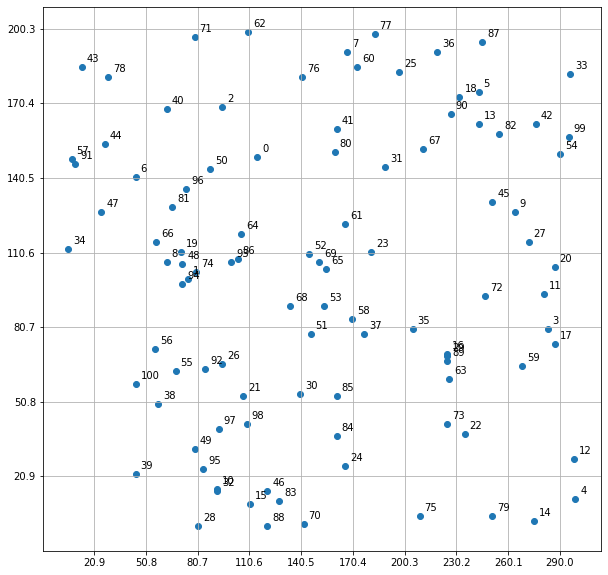

In [ ]:
# plot
xs = [float(point[0]) for point in stations_coord] 
ys = [float(point[1]) for point in stations_coord]



fig = plt.figure(figsize=(10,10))
ax = plt.axes()
s = max (max(xs),max(ys))
m = min (min(xs),min(ys))
SIZE = 10
plt.grid()

#cool one liner!
#plt.scatter(*zip(*stations_coord))
for i,txt in enumerate(labels_stations):

  if this_type == "ex_circular":
    if i != len(labels_stations)-1:
      dx,dy = get_labels_distances(xs[i],ys[i],d=10)
      ax.set_xticks(np.arange(m-10,+s+10,s/10))
      ax.set_yticks(np.arange(m-10,+s+10,s/10))
      plt.annotate(txt, 
                  (xs[i],ys[i]),
                    textcoords="offset points", # how to position the text
                    xytext=(dx,dy), # distance from text to points (x,y)
                    ha='center', # horizontal alignment can be left, right or center 
                    size = SIZE
                    )
  elif this_type == ("circular"):
    ax.set_xticks(np.arange(m-10,+s+10,s/10))
    ax.set_yticks(np.arange(m-10,+s+10,s/10))
    plt.annotate(txt, 
                (xs[i],ys[i]),
                  size = SIZE
                  )
  else:
    ax.set_xticks(np.arange(m-10,+s+10,s/10))
    ax.set_yticks(np.arange(m-10,+s+10,s/10))
    dx,dy = 5,5
    plt.annotate(txt, 
                  (xs[i],ys[i]),
                  textcoords="offset points", # how to position the text
                  xytext=(dx,dy), # distance from text to points (x,y)
                  size = SIZE
                )
plt.scatter(xs, ys)
plt.show()

initial random path [83, 53, 70, 45, 44, 39, 22, 80, 10, 0, 18, 30, 73, 33, 90, 4, 76, 77, 12, 31, 55, 88, 26, 42, 69, 15, 40, 96, 9, 72, 11, 47, 85, 28, 93, 5, 66, 65, 35, 16, 49, 34, 7, 95, 27, 19, 81, 25, 62, 13, 24, 3, 17, 38, 8, 78, 6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68, 61, 97, 79, 41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29, 1, 52, 21, 2, 23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51, 83]
initial cost : 12438.23


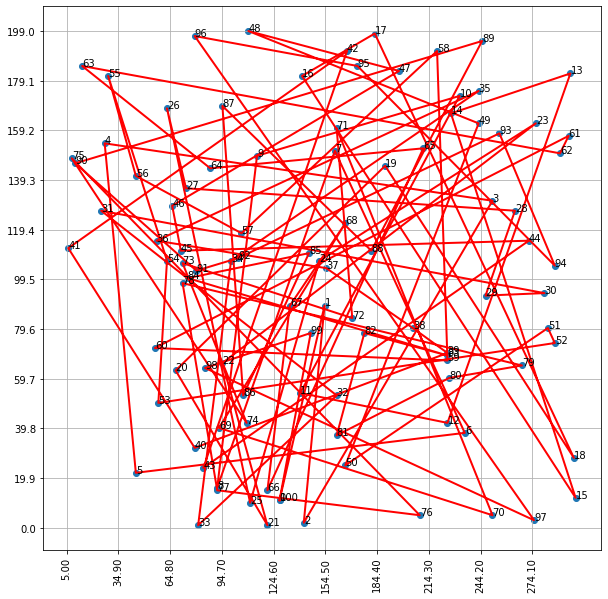

In [ ]:
# check if initialization is correct

#Initialise with a random permutation of stations
np.random.seed(seed = 42)
initial_path = np.random.permutation(len(stations_coord)-1) 
initial_path = [x for x in initial_path]

# the route must end where it started
first_element = initial_path[0]
initial_path.append(first_element)

print ("initial random path",initial_path)
initial_cost, weights_list = Euclidean_path_cost(initial_path)
#print ("costs: ",weights_list)
print ("initial cost : %.2f"%initial_cost)

#print initial solution
print_path(initial_path,stations_coord,"always",h=10,l=10, Dlab = 5, Slab = 10)

## run 

In [ ]:
path = initial_path
cost = initial_cost
all_final_costs = []
counter = 0
MAX_RUN = 10000
while counter < MAX_RUN :
  path, cost, counter,all_final_costs = two_OPT(weights_list, path, cost, counter,all_final_costs, False)

final_path,final_cost = path, cost

RUN: 0
RUN: 1000
RUN: 2000
RUN: 3000
RUN: 4000
RUN: 5000
RUN: 6000
RUN: 7000
RUN: 8000
RUN: 9000


initial cost : 12438.23
final cost : 2385.72

paths 
initial random path [83, 53, 70, 45, 44, 39, 22, 80, 10, 0, 18, 30, 73, 33, 90, 4, 76, 77, 12, 31, 55, 88, 26, 42, 69, 15, 40, 96, 9, 72, 11, 47, 85, 28, 93, 5, 66, 65, 35, 16, 49, 34, 7, 95, 27, 19, 81, 25, 62, 13, 24, 3, 17, 38, 8, 78, 6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68, 61, 97, 79, 41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29, 1, 52, 21, 2, 23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51, 83]
final path [19, 8, 66, 81, 47, 6, 34, 57, 91, 44, 43, 78, 40, 2, 71, 62, 76, 7, 60, 77, 36, 87, 18, 90, 67, 5, 13, 82, 42, 33, 99, 54, 20, 11, 3, 17, 12, 4, 14, 79, 73, 63, 22, 59, 27, 9, 45, 72, 16, 29, 89, 35, 37, 58, 53, 85, 51, 68, 65, 52, 69, 61, 23, 31, 25, 41, 80, 0, 50, 96, 64, 86, 94, 56, 55, 92, 38, 39, 49, 95, 97, 98, 28, 10, 32, 15, 46, 88, 83, 70, 75, 24, 84, 30, 21, 26, 93, 74, 1, 48, 19]


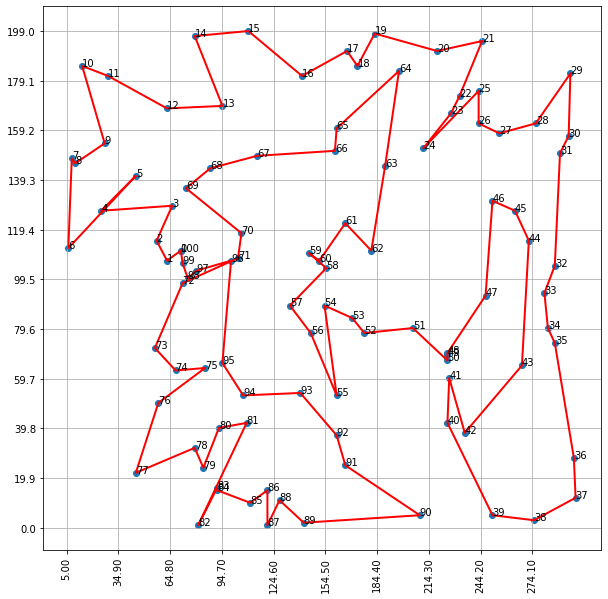

In [ ]:
print_best_solution(initial_path,initial_cost,final_path,final_cost, H = 10, L = 10, DLAB = 10 , SLAB = 10)

In [ ]:
min(all_final_costs)

2385.7150769233376

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


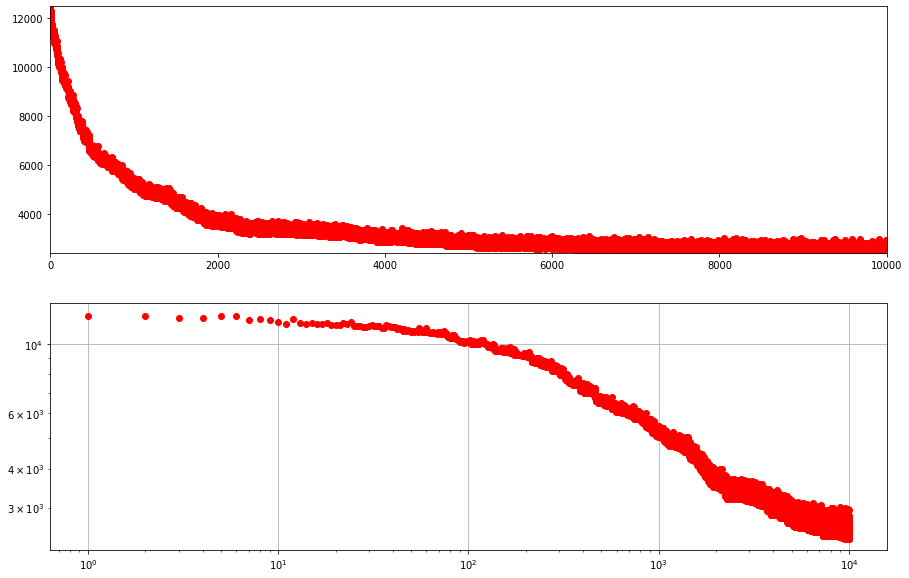

In [ ]:
print_all_costs(all_final_costs)

## run again 

In [ ]:
path,cost = final_path,final_cost
all_final_costs = []
counter = 0
MAX_RUN = 10000
while counter < MAX_RUN :
  path, cost, counter,all_final_costs = two_OPT(weights_list , path, cost, counter,all_final_costs, print_statement = False)

final_path,final_cost = path, cost

RUN: 0
RUN: 1000
RUN: 2000
RUN: 3000
RUN: 4000
RUN: 5000
RUN: 6000
RUN: 7000
RUN: 8000
RUN: 9000


initial cost : 12438.23
final cost : 2197.01

paths 
initial random path [83, 53, 70, 45, 44, 39, 22, 80, 10, 0, 18, 30, 73, 33, 90, 4, 76, 77, 12, 31, 55, 88, 26, 42, 69, 15, 40, 96, 9, 72, 11, 47, 85, 28, 93, 5, 66, 65, 35, 16, 49, 34, 7, 95, 27, 19, 81, 25, 62, 13, 24, 3, 17, 38, 8, 78, 6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68, 61, 97, 79, 41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29, 1, 52, 21, 2, 23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51, 83]
final path [31, 23, 61, 65, 69, 52, 68, 51, 53, 58, 37, 35, 89, 29, 16, 72, 45, 9, 27, 59, 63, 73, 22, 79, 14, 4, 12, 17, 3, 11, 20, 54, 99, 33, 42, 82, 13, 5, 18, 87, 36, 77, 60, 7, 76, 62, 71, 2, 40, 78, 43, 44, 57, 91, 34, 47, 6, 81, 66, 8, 19, 48, 74, 1, 94, 92, 55, 56, 38, 39, 49, 97, 98, 95, 28, 10, 32, 15, 46, 83, 88, 70, 75, 24, 84, 85, 30, 21, 26, 93, 86, 64, 96, 50, 0, 80, 41, 25, 90, 67, 31]


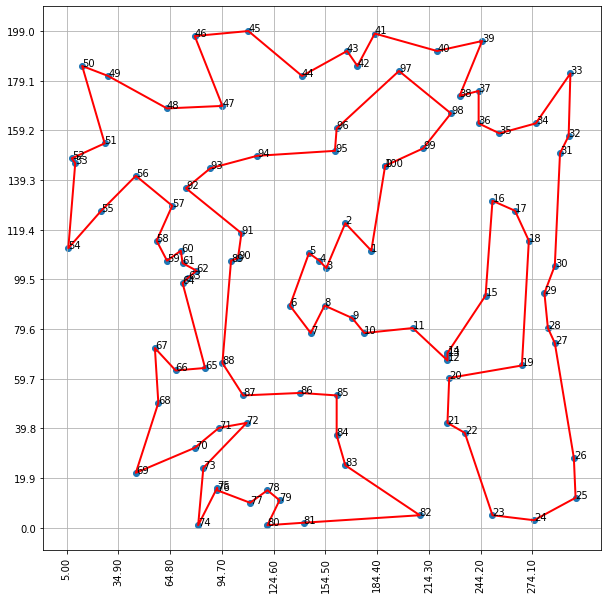

In [ ]:
print_best_solution(initial_path,initial_cost,final_path,final_cost, H = 10, L = 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


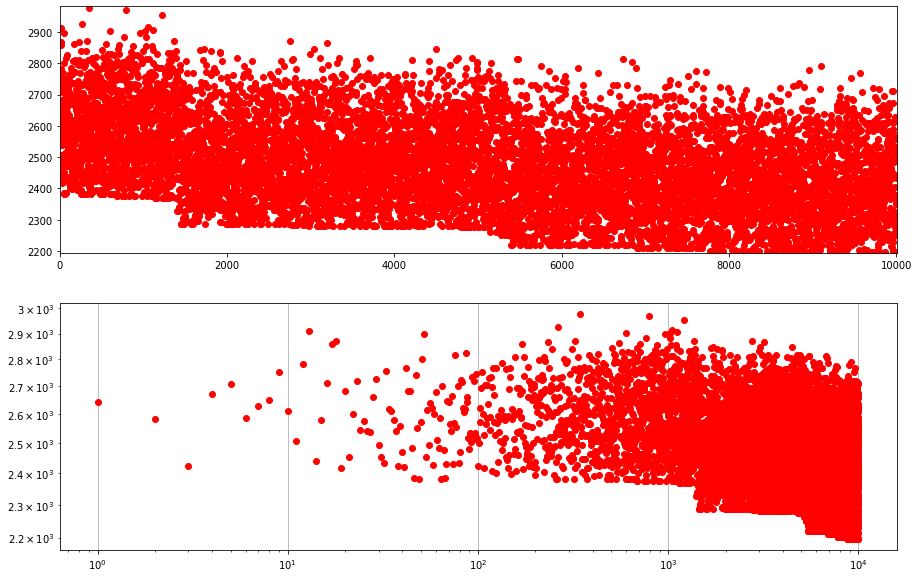

In [ ]:
print_all_costs(all_final_costs)

# TSP with GPX

## functions

### edges operators

In [ ]:
def revert_order_in_edges(list_of_edges):
  """
  rev_list_of_edges = revert_order_in_edges(list_of_edges)
  (u,v)--->(v,u)
  """
  rev_list_of_edges = [(v,u) for (u,v) in list_of_edges]
  return rev_list_of_edges

def get_expanded_list (list_of_edges):
  """
  expanded_list = get_expanded_list (list_of_edges)
  [(u,v),(v,u)] <- [(u,v)]
  """
  rev_list_of_edges = revert_order_in_edges(list_of_edges)
  expanded_list = rev_list_of_edges+list_of_edges
  return expanded_list 

In [ ]:
def get_common_edges(list_1,list_2):
  """
  common_edges = get_common_edges(list_1,list_2)
  get common edges between two UNDIRECTED lists (meaning (2,3) == (3,2))
  """
  expanded_list_1 = get_expanded_list (list_1)
  common_edges = list(set(expanded_list_1).intersection(list_2))
  not_common_edges = list(set(expanded_list_1).symmetric_difference(get_expanded_list(list_2)))
  return common_edges,not_common_edges

In [ ]:
def sort_edges(list_of_edges):
  """
  sorted_list_of_edges = sort_edges(list_of_edges)

  first element of tuple < second element of tuple
  """
  sorted_list_of_edges = [(u,v) if u < v else (v,u) for (u,v) in list_of_edges]
  return sorted_list_of_edges

In [ ]:
def list_unique(x):
  return list(set(x))

In [ ]:
def mark_common_edges (edges_x,edges_y, print_statement = True):
  """
  edges_x_formatted,edges_y_formatted = mark_common_edges (edges_x,edges_y)
  """
  if print_statement == True:
    print (" in green filler common edges ")
  comm, uncomm = get_common_edges(edges_x,edges_y)
  common_edges, not_common_edges = list_unique(sort_edges(comm)), list_unique(sort_edges(uncomm))

  edges_x_formatted = [Fore.WHITE + Back.GREEN + str(edgetuple) + Style.RESET_ALL if edgetuple in edges_y
                  else str(edgetuple) for edgetuple in edges_x ]
  edges_x_formatted = " ".join(edges_x_formatted)

  edges_y_formatted = [Fore.WHITE + Back.GREEN + str(edgetuple) + Style.RESET_ALL if edgetuple in edges_x
                  else str(edgetuple) for edgetuple in edges_y ]
  edges_y_formatted = " ".join(edges_y_formatted)


  return edges_x_formatted,edges_y_formatted,common_edges,not_common_edges

In [ ]:
test_edges_1 = [(1,2),(3,4),(5,7)]
test_edges_2 = [(1,2),(4,3),(5,8)]

#rev_list_of_edges = revert_order_in_edges(test_edges_1)
#print (rev_list_of_edges)
#test_intersection = list(set(test_edges_1).intersection(test_edges_2))
#test_intersection
comm, uncomm = get_common_edges(test_edges_1,test_edges_2)
common_edges, not_common_edges = sort_edges(comm), sort_edges(uncomm)
print(common_edges)
print(not_common_edges)
print (list_unique(not_common_edges))

[(1, 2), (3, 4)]
[(5, 7), (5, 8), (5, 7), (5, 8)]
[(5, 7), (5, 8)]


In [ ]:
# cost function, simple euclidean norm between station X = S[idx_st2] and station Y = S[idx_st1]
def euclidean_distance_ex(indx,indy,stations_coord,labels_stations):
    XY_cost = 0
    try:
      ax,ay = stations_coord[indx-1] #Correction for GPX
      bx,by = stations_coord[indy-1]
    except Exception as e: 
        print(e)
        #print (indx,indy)
        #explore_var(stations_coord, "nodes coordinates")
        #print (bx,by)
    else: 
      #XY_cost = np.linalg.norm(A-B)
      XY_cost = math.sqrt((ax-bx)**2+(ay-by)**2)
    
    #  print ("cost from %i to %i : %.2f "%(indx,indy,XY_cost))
    return XY_cost    

# total path cost
def Euclidean_path_cost_ex(path,stations_coord,labels_stations):
  cost = 0
  weights_list = []
  for i in range(1,len(path)):
    indx = path[i-1] #previous station
    indy = path[i] # next station
    #print ("%s) idx: %i idy: %i "% (i,indx,indy))
    XY_cost = euclidean_distance_ex(indx,indy,stations_coord,labels_stations)
    weights_list.append(XY_cost)
    cost = cost + XY_cost
  return cost,weights_list

### print one path ex

dedicated function for GPX

In [ ]:
def print_path_ex( current_path, stations_coord, dict_labels_nodes,h=30,l=30, Dlab = 10, Slab = 20, name = 0):
  """
  print_path_ex( current_path, stations_coord, dict_labels_nodes,h=30,l=30, Dlab = 10, Slab = 20, name = 0)
  """
  # plot
  # correct the lack of the last link in the current path (its already in the edges)
  #current_path.append(current_path[0]) #CHECK
  #print ("-"*40)
  #explore_var(current_path, "current path")
  verts = []
  for st in current_path: # take the best path and plot
    #print ("see  HERE")
    #print (st)
    try:
      u,v = dict_labels_nodes[str(st)]
      #print ("HERE")
      #print (u,v)
      verts.append((u,v))
    except Exception as e: 
      print(e)


  codes = [Path.MOVETO]*len(verts)

  #print (best_path)
  #print (len(verts))
  #print ((len(codes)))
  path = Path(verts, codes)

  fig = plt.figure(figsize=(h,l))
  ax = plt.axes()
  plt.grid()
  #fig, ax = plt.subplots()
  
  patch = patches.PathPatch(path, facecolor='none', lw=2)
  ax.add_patch(patch)

  # only this path coordinates
  xs, ys = zip(*verts)

  # all nodes names!
  x_s = [float(point[0]) for point in stations_coord] 
  y_s = [float(point[1]) for point in stations_coord]
  s = max (max(x_s),max(y_s))
  m = min (min(x_s),min(y_s))

  # settings of plto
  ax.plot(xs, ys, lw=2, color='blue', ms=10, alpha = 0.5)
  x_axis = np.arange(min(xs)-1, max(xs)+1,max(xs)/10)
  ax.set_xticks(x_axis)
  xlabels = ["%.2f"%x for x in x_axis]
  ax.set_xticklabels(xlabels, rotation=90)
  ax.set_yticks(np.arange(min(ys)-1, max(ys)+1,max(ys)/10))

  for i,txt in enumerate(current_path):
    if i < len(current_path):
      dx,dy = get_labels_distances(xs[i],ys[i],d=Dlab)
      plt.annotate(txt, 
                  (xs[i], ys[i]),
                  textcoords="offset points", # how to position the text
                  xytext=(dx,dy), # distance from text to points (x,y)
                  ha='center', # horizontal alignment can be left, right or center 
                  size = Slab
                  )


  plt.scatter(xs, ys)

  #ax.set_xlim(-0.1, 200)
  #ax.set_ylim(-0.1, 200)
  if name != 0:
    plotlabel = "%s" %name
    plt.title (plotlabel , size=20)
  plt.show()

### find neightbours

In [ ]:
# find all nodes reachable from one node
def find_all_neightbours(list_edges,start_from_zero = False, print_statement = False):
  neightbours = dict()
  for edge in list_edges:
    if print_statement == True: 
      print (edge)
    if len(edge) == 2:
      (u,v) = edge
    else:
      (u,v,w) = edge

    # this is due to the fact that our nodes start from 1 and not from zero, 
    # in the bridge fuction its a mess with dimensionalities if the zero is skipped
    # so just moved the input backwards of one and then the output will be output+1
    if start_from_zero == True: 
      u = u-1
      v = v-1

    #append neighbours of each node
    if not u in neightbours.keys():
      this_node_neighbours_list = [v]
      neightbours[u] = this_node_neighbours_list
    else:
      this_node_neighbours_list = neightbours[u]
      this_node_neighbours_list.append(v)
      neightbours[u] = this_node_neighbours_list
    if not v in neightbours.keys():
      this_node_neighbours_list = [u]
      neightbours[v] = this_node_neighbours_list
    else:
      this_node_neighbours_list = neightbours[v]
      this_node_neighbours_list.append(u)
      neightbours[v] = this_node_neighbours_list
  return neightbours

### check if is connected, find connected components

In [ ]:
# simple BFS
def bfs(neightbours,node):
  visited = [] # List to keep track of visited nodes.
  queue = []     #Initialize a queue
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0) 
    #print (s, end = " ") 
  
    for neighbour in (neightbours[s]):
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
  return visited

# BFS for checking that a graph  is connected
# starting from one arbitrary node
# i can reach all the others
def is_connected(neightbours, n):
  node = 1 #arbitrary choice of starting node
  visited = bfs(neightbours, node)
  return (len(visited)==n)

def find_connected_component_from_node(neightbours,node):
  visited = bfs(neightbours, node)
  return visited

### flat list of tuples

In [ ]:
def flat_list_tuples(list_tuples, unique = True):
  flat = (list(sum(list_tuples, ())))
  if unique == True:
    flat = list(set(flat))
  return flat

In [ ]:
def explore_var (x, name = 0):
  if name == 0:
    print ("type:%s len:%s details:%s" %(type(x), len(x), x))
  else:
    print ("%s len:%s details:%s" %(name, len(x), x))

### explore k

In [ ]:
## FULL
#size

def explore_k(k_1, print_statement = True,plot_statement = False):
  """
  original_x,original_y,x,y,common_edges,not_common_edges,edges_list_x,x_cost,edges_list_y,y_cost,graphic_stuff= explore_k(k_1)
  """
  #k_1 = 2
  n = (64*k_1)

  #input
  x= [1,2,
      (n/8)-2,(n/8),(n/8)+2,(n/8)-1,(n/8)+1,(n/8)+3,(n/8)+4,
      (n*3/8)-3,(n*3/8)-1,(n*3/8)+1,(n*3/8)-2,(n*3/8),(n*3/8)+2,(n*3/8)+3,
      (n*7/8)-3,(n*7/8)+3,(n*7/8)-2,(n*7/8),(n*7/8)+2,(n*7/8)-1,(n*7/8)+1,(n*7/8)+4,(n*7/8)+5,
      n
      ]

  y= [1,2,
      (5*n/8)-2,(5*n/8),(5*n/8)+2,(5*n/8)-1,(5*n/8)+1,(5*n/8)+3,(5*n/8)+4,
      n]

  # x and y have their own unique definition
  x = use_integers(x)
  original_x = x.copy()

  if print_statement == True:
    print ("-"*10)
    print (" x ")
    #print (list(range(len(original_x))))  #both this and the np pandas visualization to check indexes sucks and is more confusing, do without!
    print (original_x)
  

  # find extremes of each set 
  L = use_integers([2,(n/8)+4,(n*3/8)+3,(n*7/8)+5])
  R = use_integers([(n/8)-2,(n*3/8)-3,(n*7/8)-3,n])
  L_positions_missing = [x.index(element) for element in L]
  R_positions_missing = [x.index(element) for element in R]

  #store the (length of ?) inserted list by their positions
  insertions_x = dict()

  cum_lenght = 0

  # create list and insert list
  for i in range(len(L)):
    pos = L_positions_missing[i]+1
    thisL = L[i]
    thisR = R[i]
    list_insert = list(range(thisL+1,thisR))
    insertions_x[cum_lenght+pos] = (list_insert) 
    if print_statement == True:
      print ("inserting list: %s of length: %s in position : %s" %(list_insert, len(list_insert),cum_lenght+pos))
    x[cum_lenght+pos:cum_lenght+pos] = list_insert
    cum_lenght += len(list_insert)

  #----------------------------------------------------------------------------------
  y = use_integers(y)
  original_y = y.copy()
 
  if print_statement == True:
    print ("-"*10)
    print (" y ")
    #print (list(range(len(original_y))))
    print (original_y)

  # find extremes of each set 
  Ly = use_integers([2,(5*n/8)+4])
  Ry = use_integers([(5*n/8)-2,n])
  L_positions_missing_y = [y.index(element) for element in Ly]
  R_positions_missing_y = [y.index(element) for element in Ry]

  #store the length of inserted list by their positions
  insertions_y = dict()
  
  cum_lenght = 0

  # create list and insert list
  for i in range(len(Ly)):
    pos = L_positions_missing_y[i]+1
    thisLy = Ly[i]
    thisRy = Ry[i]
    list_insert = list(range(thisLy+1,thisRy))
    insertions_y[cum_lenght+pos] = (list_insert) 
    if print_statement == True:
      print ("inserting list: %s of length: %s in position : %s" %(list_insert, len(list_insert),cum_lenght+ pos))
    y[cum_lenght+pos:cum_lenght+pos] = list_insert
    cum_lenght += len(list_insert)

  #do i have to add the first station as last? i think so but...
  #x.append(x[i])
  #y.append(y[i])

  # check 
  x_formatted = format_path (x,original_x)
  y_formatted = format_path (y,original_y)

  if print_statement == True:
    print ("")
    print ("before addition of nodes")
    #print (list(range(len(original_x))))
    print("original x:" ,original_x)
    print("original y:" ,original_y)
    print ("after addition of nodes")
    print("x:" ,x_formatted)
    print("y:",y_formatted)
    print ("")


  common_edges,not_common_edges,edges_list_x,x_cost,edges_list_y,y_cost,graphic_stuff= output_common_edges(x,y,r, print_statement , plot_statement )

  stations_coord,labels_stations,dict_labels_nodes = graphic_stuff 

  #update isertions_x and _y
  # path costs and weights

  for pos in insertions_x.keys():
    list_insert = insertions_x[pos]
    list_insert_cost, weights_list = Euclidean_path_cost_ex(list_insert,stations_coord,labels_stations)
    insertions_x[pos] = (list_insert_cost,list_insert)

  for pos in insertions_y.keys():
    list_insert = insertions_y[pos]
    list_insert_cost, weights_list = Euclidean_path_cost_ex(list_insert,stations_coord,labels_stations)
    insertions_y[pos] = (list_insert_cost,list_insert)

  insertions = [insertions_x,insertions_y]
  return original_x,original_y,x,y,common_edges,not_common_edges,edges_list_x,x_cost,edges_list_y,y_cost,graphic_stuff,insertions

### output common edges

In [ ]:
def output_common_edges(x,y,r, print_statement = True, plot_statement = False):
  """
  common_edges,not_common_edges,edges_list_x,x_cost,edges_list_y,y_cost,graphic_stuff = output_common_edges(x,y,r, print_statement = True, plot_statement = False)
  """
  # create station positions
  N = len(x)
  # randomly initialized
  this_type = "ex_circular"  #(ex_circular, circular, random, structured)
  stations_coord = create_station_position(N,r, mytype = this_type)
  #stations_coord = stations_coord#[:-1]#droppo il dummy
  labels_stations = name_stations(N, geografic_names = False, only_numbers = True,start_from_one = True)


  # -----------------
  #explore_var(stations_coord)
  #explore_var(labels_stations)




  # create a dictionary for this
  dict_labels_nodes = dict()
  for i,label in enumerate(labels_stations[:-1]):
    #print (i,label,stations_coord[i])
    u,v = stations_coord[i]
    dict_labels_nodes[label] = (u,v)


  # -----------------
  #print (stations_coord)
  #print (dict_labels_nodes)

  # path costs and weights
  x_cost, weights_list_x = Euclidean_path_cost_ex(x,stations_coord,labels_stations)
  y_cost, weights_list_y = Euclidean_path_cost_ex(y,stations_coord,labels_stations)
  costs = [x_cost,y_cost]
  # create list of edges
  edges_list_x,dict_weights_x = create_edges(x,weights_list_x)
  edges_list_y,dict_weights_y = create_edges(y,weights_list_y)

  # no need to readd edge now #CHECK
  #edges_list_x.append((x[-1],x[0]))
  #edges_list_y.append((y[-1],y[0]))


  # create union of all edges
  union_edges = edges_list_x + edges_list_y

  # find common edges 
  # and print to check if you want
  edges_x_formatted,edges_y_formatted,common_edges,not_common_edges = mark_common_edges (edges_list_x,edges_list_y, print_statement)
  if print_statement == True:
    print ("")
    print ("found %s common edges" %len(common_edges))
    print (sorted(common_edges))
    print (edges_x_formatted)
    print (edges_y_formatted)

  #all edges minus common ones
  search_edges = [edge for edge in union_edges if not edge in common_edges]

  #print x,y
  parents = [x,y]
  parents_labels = ['x','y']

  if plot_statement == True:
    for i,var in enumerate(parents):
      #plt.subplot(1,2,i+1)
      name = parents_labels[i]
      this_cost = costs[i]
      plot_title = "%s"%name
      #explore_var(var,plot_title)
      print ("%s cost: %s"%(plot_title,this_cost))
      print_path_ex(var,stations_coord, dict_labels_nodes, h=10,l=10, Dlab = 10, Slab = 10, name = plot_title)

  graphic_stuff = [stations_coord,labels_stations,dict_labels_nodes]

  return common_edges,not_common_edges,edges_list_x,x_cost,edges_list_y,y_cost,graphic_stuff

### get connected components

In [ ]:
def get_connected_components(common_edges,not_common_edges,stations_coord,labels_stations,dict_labels_nodes, plot_statement = True):
  """
  dict_neighbours,connected_components,entry_nodes = get_connected_components(common_edges,not_common_edges,stations_coord,labels_stations,dict_labels_nodes)
  """
  # create a dictionary with all nodes neightbours
  # note that is done over search edges, which are given by all the edges of x and y, so one node can (shall?) have more or equal two edges
  dict_neighbours = find_all_neightbours(not_common_edges,start_from_zero = False, print_statement = False)
  
  #explore_var(dict_neighbours, "dictionary of neightbours of node from not common edges")
 # take a list with all the nodes
  nodes_search = list(dict_neighbours.keys())


  # find the connected components
  connected_components = dict()
  nodes_added = list()
  counter = 0
  for node in nodes_search:
    if not node in nodes_added:
      connected_nodes = find_connected_component_from_node(dict_neighbours,node)
      connected_components[counter] = connected_nodes
      nodes_added += connected_nodes
      counter +=1

  # create list of nodes taken from the list of common edges
  common_nodes = flat_list_tuples(common_edges, unique = True)
  #print ("nodes covered by common edges: %s" %common_nodes)


  # for each component find the connection nodes
  # these are nodes that have only one
  entry_nodes =dict()
  cc_edges = dict()
  for k in connected_components.keys():

    # this is a list of nodes
    cc = connected_components[k] 
    #print ("")
    #explore_var(cc, "connected component")

    # path costs and weights
    cc_cost, weights_list_cc = Euclidean_path_cost_ex(cc,stations_coord,labels_stations)

    # create list of edges
    #edges_list_cc,dict_weights_cc = create_edges(cc,weights_list_cc)

    #edges_list_cc = [(v,u) if u> v else (u,v) for (u,v) in edges_list_cc]

    ##edges_from_x = [edge for edge in edges_list_cc if edge in edges_list_x]
    #edges_from_y = [edge for edge in edges_list_cc if edge in edges_list_y]

    edges_list_cc = []
    for node in cc:
      vicini = dict_neighbours[node]
      this_node_edges = [(node,v) for v in vicini]
      this_node_edges = sort_edges(this_node_edges)
      edges_list_cc += this_node_edges
    
    these_cc_entry_nodes = [node for node in cc if node in common_nodes]
    entry_nodes[k] = these_cc_entry_nodes


    # this edges list is the IMPORTANT one 
    edges_list_cc = list_unique(edges_list_cc)
    #print ("edges_from_cc:",sorted(edges_list_cc))

    cc_edges[k] = edges_list_cc

    #if plot_statement == True:
      #plot_title = "connected component %s"%k

      #path_cc = create_path(edges_list_cc)
      #explore_var(path_cc, "path cc")
      #print_edges_ex(edges_list_cc, stations_coord, dict_labels_nodes,h=10,l=10, Dlab = 10, Slab = 10, name = plot_title)


  return dict_neighbours,connected_components,entry_nodes,cc_edges

### select shortest path among components

In [ ]:
def select_shortest_path (connected_components,edges_list_x,edges_list_y,stations_coord,labels_stations,cc_edges):
  """
  cc_best_path = select_shortest_path (connected_components,edges_list_x,edges_list_y,stations_coord,labels_stations)
  simpyfied version in which i look for the shortest path between the path inherited from parent1 and the path iherited from parent2

  """
  cc_best_path = dict()
  for k in connected_components.keys():
    all_edges = cc_edges[k]
    # the edges in x and y are already sorted so that u<v for (u,v)
    edges_from_x = [edge for edge in all_edges if edge in get_expanded_list(edges_list_x)]
    edges_from_y = [edge for edge in all_edges if edge in get_expanded_list(edges_list_y)]

    #print (len (all_edges), len(edges_from_x),len(edges_from_y))
    # calculate the weight for the paths
    all_weight_x = [euclidean_distance_ex(u,v,stations_coord,labels_stations) for u,v in edges_from_x]
    all_weight_y = [euclidean_distance_ex(u,v,stations_coord,labels_stations) for u,v in edges_from_y]
    # get the sum
    sum_x = sum(all_weight_x)
    sum_y = sum(all_weight_y)

    if sum_x > sum_y:
      selected_edges = edges_from_y
      #print ("y choosen")
    else:
      selected_edges = edges_from_x
      #print ("x choosen")
    cc_best_path[k] = selected_edges

  return cc_best_path

### childbirth

In [ ]:
def childbirth(common_edges,cc_best_path,stations_coord,labels_stations, plot_statement = False):
  """
  child_edges, child_path,child_sum = childbirth(common_edges,cc_best_path,stations_coord,labels_stations, plot_statement = False)
  """
  child_edges = []
  child_edges += common_edges 
  for k in cc_best_path.keys():
    child_edges += cc_best_path[k] 
  all_weight_c = [euclidean_distance_ex(u,v,stations_coord,labels_stations) for u,v in child_edges]
  child_sum = sum(all_weight_c)
  #explore_var (sorted(child_edges), "child")
  #print ("child_weight", child_sum)
  child_path = create_path(child_edges)

  if plot_statement == True:
    print_path_ex( child_path, stations_coord, dict_labels_nodes,h=10,l=10, Dlab = 10, Slab = 10, name = 0)
  return child_edges, child_path,child_sum

### Full Run 
no print no plot, goes with statistics

In [ ]:
def full_run_GPX(k):
  """
  genitore1,genitore2,prole = full_run_GPX(k)
  """
  original_x,original_y,x,y,common_edges,not_common_edges,edges_list_x,x_cost,edges_list_y,y_cost,graphic_stuff,insertions= explore_k(1, print_statement = False,plot_statement = False)

  stations_coord,labels_stations,dict_labels_nodes = graphic_stuff 

  # visualization of x and y together
  #print_multiplepath(x,y,stations_coord,h=10,l=10, Dlab = 10, Slab = 15, name = "Plotting x and y together")

  #find connected components
  dict_neighbours,connected_components,entry_nodes,cc_edges = get_connected_components(common_edges,not_common_edges,stations_coord,labels_stations,dict_labels_nodes, plot_statement = True)

  # find shortest path in components
  cc_best_path = select_shortest_path (connected_components,edges_list_x,edges_list_y,stations_coord,labels_stations,cc_edges)


  #childbirth
  child_edges, child_path,child_sum = childbirth(common_edges,cc_best_path,stations_coord,labels_stations, plot_statement = False)

  genitore1 = (x,x_cost)
  genitore2 = (y,y_cost)
  prole = (child_path,child_sum)
  return genitore1,genitore2,prole

### statistics

In [ ]:
def statistics(k,T,C,U,Ix,Iy,print_results = False):
  original_x,original_y,x,y,common_edges,not_common_edges,edges_list_x,x_cost,edges_list_y,y_cost,graphic_stuff,insertions = explore_k(k, print_statement = False)
  all_var = [original_x,original_y,x,y,common_edges,not_common_edges]
  var_labels =[ "original_x" ,"original_y","x","y","common_edges","not_common_edges","edges_list_x","edges_list_y" ]

  if print_results == True:
    for i,var in enumerate(all_var):
      this_lab = var_labels[i]
      explore_var (var, this_lab)


  all_edges = sort_edges(edges_list_x) + sorted(edges_list_y)
  total_edges = list(set(all_edges))
  T.append(len(total_edges))
  C.append(len(common_edges))
  U.append (len(not_common_edges))
  Ix.append(insertions[0])
  Iy.append(insertions[1])
  return T,C,U,Ix,Iy

### create path from path list edges

In [ ]:
def create_path(list_edges, print_statement = False, start = -1):
  """
  
  given a list of edges that supposly are connected, create a path 
  default start, min node
  """

  # create list of nodes taken from the list of common edges
  all_nodes = flat_list_tuples(list_edges, unique = True)

  #create empty path
  path = []

  # next! 
  queue = []

  # edges visited
  visited = []

  if start != -1:
    if not start in all_nodes:
      if print_statement == True:
        print ("the start %s is not a node in the path")
      return  path
  else: 
    start = min(all_nodes)

  queue.append(start)

  while len(path) < len(all_nodes):
    if len(queue) > 0:
      node = queue.pop(0)
    else:
      unexplored_nodes= [node for node in all_nodes if not node in path]
      node = unexplored_nodes[0]

    path.append(node)
    if print_statement == True:
      print ("node %s added to the path" %node)

    edges_with_node = [(u,v) for (u,v)  in list_edges if (u == node or v == node)]
    #print (edges_with_node)

    for edge in edges_with_node:
      if not edge in visited:
        u,v = edge
        
        if node == u:
          next_node = v
          queue.append(next_node)
          visited.append(edge)
          break
        elif node == v:
          next_node = u
          queue.append(next_node)
          visited.append(edge)
          break
        else: 
          continue 
      else:
        if print_statement == True:
          print ("edge (%s,%s) already crossed" %edge)
  
  return path




  


### create a new list of edges with weights 

In [ ]:
def create_edges_with_weights(edges_list):
  edges_with_weights = [(u,v,euclidean_distance_ex(u,v,stations_coord,labels_stations))for (u,v) in edges_list]
  return edges_with_weights

### get sum of weights

In [ ]:
def get_sum_weights(edges):
  all_weights = [ w for (u,v,w) in edges]
  sum_weights = sum(all_weights)
  print ( "weight",sum_weights)
  return sum_weights

#**GPX MANDATORY EXERCISE**

note that i x,y and in the child the last node( which is the first) and last edge is not reported. therefore the sum of weights of child can seem less than 2pi, but just add the last edge.

## initialize

In [ ]:
x_central_point,y_central_point  = 0, 0
r = 1
print_statement = True
plot_statement = False

In [ ]:
# this is to check correctness of analytic expressions from report
TEST_K = 2
F = 64*TEST_K #using F instead of. just cause n is overused
(3*F/8)-3

45.0

### perimeter of a regular n sided polygon iscribed in a circle

to compare


In [ ]:
perimeter = F * 2*r *math.sin(math.pi/F)
print (perimeter)

6.282554501865546


## statistics

In [ ]:
MAX = 10
K = list(range(1, MAX+1)) # list of ks
T = [] # total number of edges
C = [] # number of common edges
U = [] # number of uncommon edges
Ix = [] # list of dictionaries, in each dictionary the key:pos in which the list has been added, and the value:(weight of the list, list)
Iy= [] #same as above, for y
for k in K:
  if k % MAX/10 == 0:
    print (k)
  T,C,U,Ix,Iy = statistics(k,T,C,U,Ix,Iy,print_results=False)

10


#### explore variables 

In [ ]:
for j, this_dict in enumerate(Ix):
  print ("")
  print ("run %s" %(j+1))
  for k,v in this_dict.items():
    print ("pos: %s, weight: %s , number of elements in list: %s" %(k,v[0],len(v[1])))


run 1
pos: 2, weight: 0.19627069730967206 , number of elements in list: 3
pos: 12, weight: 0.6869474405838522 , number of elements in list: 8
pos: 27, weight: 2.355248367716066 , number of elements in list: 25
pos: 61, weight: 0.0981353486548366 , number of elements in list: 2

run 2
pos: 2, weight: 0.4908245704582458 , number of elements in list: 11
pos: 20, weight: 1.1288965120539647 , number of elements in list: 24
pos: 51, weight: 2.748617594566177 , number of elements in list: 57
pos: 117, weight: 0.4417421134124215 , number of elements in list: 10

run 3
pos: 2, weight: 0.589022338553524 , number of elements in list: 19
pos: 28, weight: 1.2762150668659686 , number of elements in list: 40
pos: 75, weight: 2.87966476626167 , number of elements in list: 89
pos: 173, weight: 0.556298875300551 , number of elements in list: 18

run 4
pos: 2, weight: 0.6381199908574362 , number of elements in list: 27
pos: 36, weight: 1.3498692114291913 , number of elements in list: 56
pos: 99, weight:

#### build dictionaries of deltas
for the weights and the lenghts

In [ ]:
deltas_Ix_w = dict()
deltas_Ix_len = dict()

for j,one_d in enumerate(Ix):
  
  previous = [0,0]
  all_keys = one_d.keys()
  print ("")
  print ("run with k = %s" %(j+1))#,all_keys)

  for i,k in enumerate(all_keys):
    # the 4 keys change, but they are always 4
    """
    the dictionaries containing the list inserted and its weight are
    keyed via "k" the position of insertion, 
    the position of insertion changes with n 
    but there are always only 4 i = [0,1,2,3] of them per all xs
    """
    #for k in range(len(all_keys)):

    #current weight, len
    w,alllist = one_d[k] # using k to access this information
    this_len = len(alllist)
    print ("%s) pos: %s, weight: %.3f, lenght: %s" %(i,k,w, this_len))

    #delta w and len compared to previous step
    delta_w = w-previous[0]
    delta_len = this_len-previous[1]

    if i in deltas_Ix_w.keys():
      #explore_var(deltas_Ix_w[k])
      thislist = deltas_Ix_w[i]
      thislist.append(delta_w)
      deltas_Ix_w[i] = thislist
      

      thislist = deltas_Ix_len[i]
      thislist.append(delta_len)
      deltas_Ix_len[i] = thislist
    else:
      #print ("initialized deltas [%s]" %k)
      deltas_Ix_w[i] = [delta_w]
      #print (deltas_Ix_w[k])
      deltas_Ix_len[i] = [delta_len]
    previous = [w,this_len]
    


run with k = 1
0) pos: 2, weight: 0.196, lenght: 3
1) pos: 12, weight: 0.687, lenght: 8
2) pos: 27, weight: 2.355, lenght: 25
3) pos: 61, weight: 0.098, lenght: 2

run with k = 2
0) pos: 2, weight: 0.491, lenght: 11
1) pos: 20, weight: 1.129, lenght: 24
2) pos: 51, weight: 2.749, lenght: 57
3) pos: 117, weight: 0.442, lenght: 10

run with k = 3
0) pos: 2, weight: 0.589, lenght: 19
1) pos: 28, weight: 1.276, lenght: 40
2) pos: 75, weight: 2.880, lenght: 89
3) pos: 173, weight: 0.556, lenght: 18

run with k = 4
0) pos: 2, weight: 0.638, lenght: 27
1) pos: 36, weight: 1.350, lenght: 56
2) pos: 99, weight: 2.945, lenght: 121
3) pos: 229, weight: 0.614, lenght: 26

run with k = 5
0) pos: 2, weight: 0.668, lenght: 35
1) pos: 44, weight: 1.394, lenght: 72
2) pos: 123, weight: 2.984, lenght: 153
3) pos: 285, weight: 0.648, lenght: 34

run with k = 6
0) pos: 2, weight: 0.687, lenght: 43
1) pos: 52, weight: 1.424, lenght: 88
2) pos: 147, weight: 3.011, lenght: 185
3) pos: 341, weight: 0.671, le

In [ ]:
#deltas_Ix_w

In [ ]:
deltas_Iy_w = dict()
deltas_Iy_len = dict()

for j,one_d in enumerate(Iy):
  
  previous = [0,0]
  all_keys = one_d.keys()
  print ("")
  print ("run with k = %s" %(j+1))#,all_keys)

  for i,k in enumerate(all_keys):
    # the 4 keys change, but they are always 4
    """
    the dictionaries containing the list inserted and its weight are
    keyed via "k" the position of insertion, 
    the position of insertion changes with n 
    but there are always only 2 i = [0,1] of them per all ys
    """
    #for k in range(len(all_keys)):

    #current weight, len
    w,alllist = one_d[k] # using k to access this information
    this_len = len(alllist)
    print ("%s) pos: %s, weight: %.3f, lenght: %s" %(i,k,w, this_len))

    #delta w and len compared to previous step
    delta_w = w-previous[0]
    delta_len = this_len-previous[1]

    (delta_w,delta_len)
    if i in deltas_Iy_w.keys():
      #explore_var(deltas_Ix_w[k])
      thislist = deltas_Iy_w[i]
      thislist.append(delta_w)
      deltas_Iy_w[i] = thislist
      

      thislist = deltas_Iy_len[i]
      thislist.append(delta_len)
      deltas_Iy_len[i] = thislist
    else:
      #print ("initialized deltas [%s]" %k)
      deltas_Iy_w[i] = [delta_w]
      #print (deltas_Ix_w[k])
      deltas_Iy_len[i] = [delta_len]
    previous = [w,this_len]


run with k = 1
0) pos: 2, weight: 3.337, lenght: 35
1) pos: 44, weight: 1.766, lenght: 19

run with k = 2
0) pos: 2, weight: 3.632, lenght: 75
1) pos: 84, weight: 2.061, lenght: 43

run with k = 3
0) pos: 2, weight: 3.730, lenght: 115
1) pos: 124, weight: 2.160, lenght: 67

run with k = 4
0) pos: 2, weight: 3.780, lenght: 155
1) pos: 164, weight: 2.209, lenght: 91

run with k = 5
0) pos: 2, weight: 3.809, lenght: 195
1) pos: 204, weight: 2.238, lenght: 115

run with k = 6
0) pos: 2, weight: 3.829, lenght: 235
1) pos: 244, weight: 2.258, lenght: 139

run with k = 7
0) pos: 2, weight: 3.843, lenght: 275
1) pos: 284, weight: 2.272, lenght: 163

run with k = 8
0) pos: 2, weight: 3.853, lenght: 315
1) pos: 324, weight: 2.283, lenght: 187

run with k = 9
0) pos: 2, weight: 3.862, lenght: 355
1) pos: 364, weight: 2.291, lenght: 211

run with k = 10
0) pos: 2, weight: 3.868, lenght: 395
1) pos: 404, weight: 2.297, lenght: 235



0


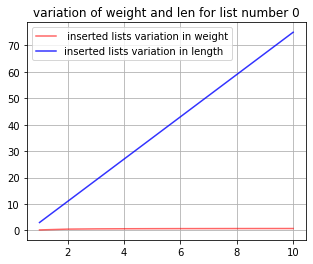


1


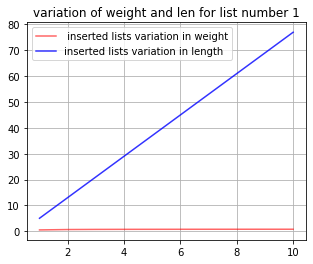


2


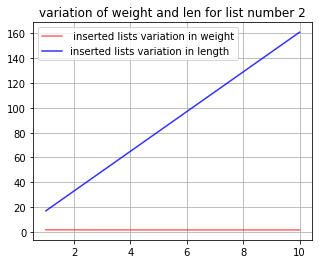


3


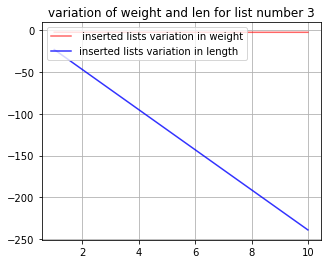

In [ ]:
for k in range(len(deltas_Ix_w.keys())):
  print ("")
  print (k)
  w_deltas = deltas_Ix_w[k]
  len_deltas = deltas_Ix_len[k]

  fig = plt.figure(figsize=(5,4))
  ax = plt.axes()
  ax.grid()
  #plt.subplot(211)
  ax.plot(K,w_deltas, 'r-', label=' inserted lists variation in weight', alpha = 0.6)
  ax.plot(K,len_deltas, 'b-', label='inserted lists variation in length', alpha = 0.8)
  ax.legend(loc='upper left');
  plt.title ("variation of weight and len for list number %s" %k)

  plt.show()

the lenght changes a lot, with n, but the weight increases progressively less and less. in the graph seems constant but it is not. it is the correspondent of a polygon with very high number of sides, the larger the number n, the closest it gets to 6,28, but theorically only for an infinite number of adimensional edges we could get the 2pi circumference.



0


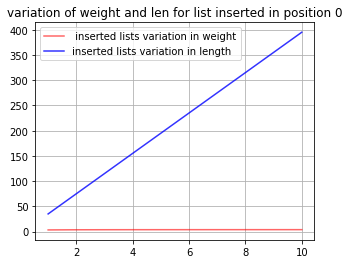


1


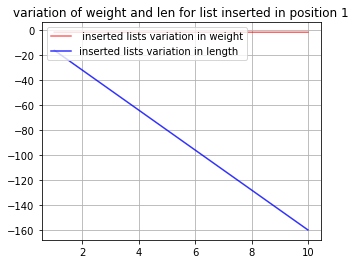

In [ ]:
for k in deltas_Iy_w.keys():
  print ("")
  print (k)
  w_deltas = deltas_Iy_w[k]
  len_deltas = deltas_Iy_len[k]

  fig = plt.figure(figsize=(5,4))
  ax = plt.axes()
  ax.grid()
  #plt.subplot(211)
  ax.plot(K,w_deltas, 'r-', label=' inserted lists variation in weight', alpha = 0.6)
  ax.plot(K,len_deltas, 'b-', label='inserted lists variation in length', alpha = 0.8)
  ax.legend(loc='upper left');
  plt.title ("variation of weight and len for list inserted in position %s" %k)

  plt.show()

In [ ]:
g = 9
print ("total edges: %s, common edges: %s, uncommon edges: %s" %(T[g],C[g],T[g]-C[g]))

total edges: 661, common edges: 617, uncommon edges: 44


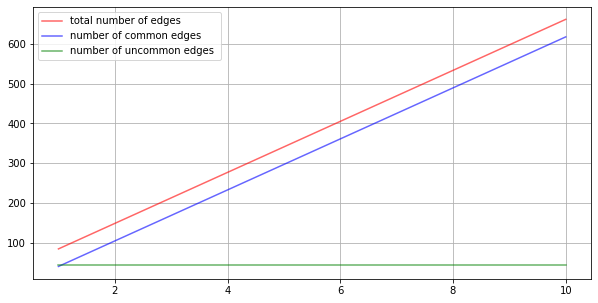

In [ ]:
#U = [T[i]-C[i] for i in list(range(len(T)))]

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.grid()
#plt.subplot(211)
ax.plot(K, T, 'r-', label='total number of edges ', alpha = 0.6)
ax.plot(K,C, 'b-', label='number of common edges ', alpha = 0.6)
ax.plot(K,U, 'g-', label='number of uncommon edges ', alpha = 0.6)
ax.legend(loc='upper left');


plt.show()

from the above plot we can say that the number of uncommon edges between x and y is constant

In [ ]:
g1 = []
g1_costs = []
g2 = []
g2_costs = []
children = []
children_costs = []

for k in range(1,MAX+1):
  genitore1,genitore2,prole = full_run_GPX(k)
  x,x_cost =  genitore1#[0],genitore1[1]
  y,y_cost = genitore2#[0],genitore2[1]
  child,child_cost = prole
  g1.append(x)
  g1_costs.append(x_cost)
  g2.append(y)
  g2_costs.append(y_cost)
  children.append(child)
  children_costs.append(child_cost)

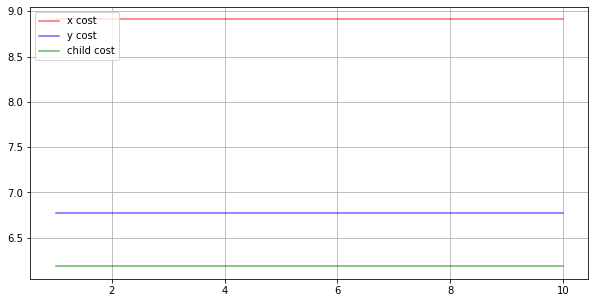

In [ ]:

fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.grid()
#plt.subplot(211)
ax.plot(K, g1_costs, 'r-', label='x cost ', alpha = 0.6)
ax.plot(K,g2_costs, 'b-', label='y cost ', alpha = 0.6)
ax.plot(K,children_costs, 'g-', label='child cost', alpha = 0.6)
ax.legend(loc='upper left');


plt.show()

## One pass explicit with plots

set k = smth

### first exploration

----------
 x 
[1, 2, 14, 16, 18, 15, 17, 19, 20, 45, 47, 49, 46, 48, 50, 51, 109, 115, 110, 112, 114, 111, 113, 116, 117, 128]
inserting list: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] of length: 11 in position : 2
inserting list: [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44] of length: 24 in position : 20
inserting list: [52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108] of length: 57 in position : 51
inserting list: [118, 119, 120, 121, 122, 123, 124, 125, 126, 127] of length: 10 in position : 117
----------
 y 
[1, 2, 78, 80, 82, 79, 81, 83, 84, 128]
inserting list: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,

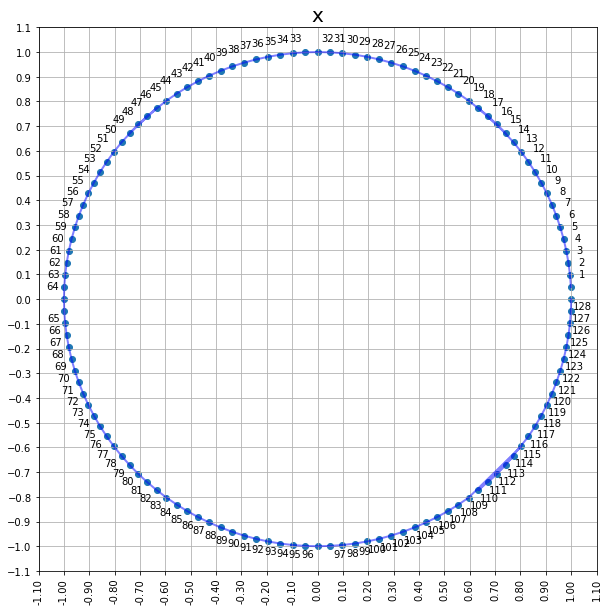

y cost: 6.52773028140929


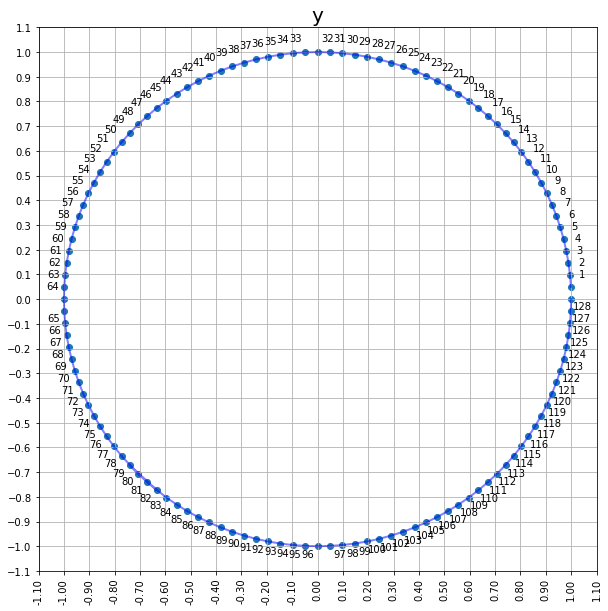

In [ ]:
original_x,original_y,x,y,common_edges,not_common_edges,edges_list_x,x_cost,edges_list_y,y_cost,graphic_stuff,insertions= explore_k(TEST_K
                                                                                                                                    , print_statement = True,plot_statement = True)

stations_coord,labels_stations,dict_labels_nodes = graphic_stuff 
#all_var = [original_x,original_y,x,y,common_edges,not_common_edges,edges_list_x,edges_list_y]
#var_labels =[ "original_x" ,"original_y","x","y","common_edges","not_common_edges","edges_list_x","edges_list_y" ]

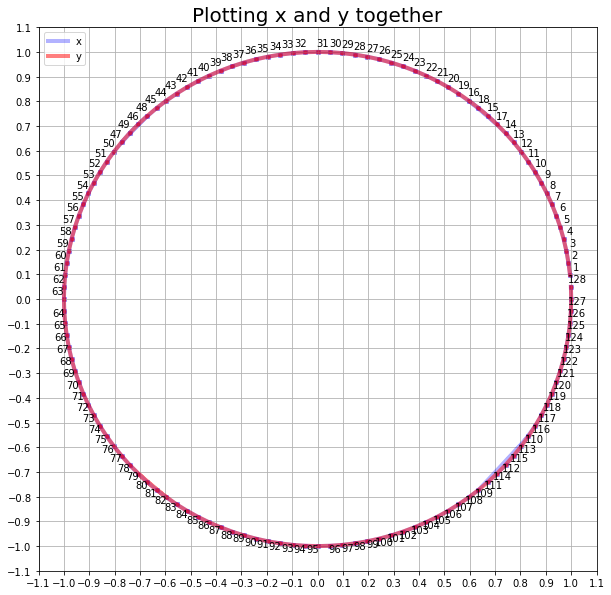

In [ ]:
 print_multiplepath(x,y,stations_coord,h=10,l=10, Dlab = 5, Slab = 10, name = "Plotting x and y together")

In [ ]:
explore_var(sorted(common_edges), "common edges")
explore_var(sorted(not_common_edges), "non common edges")

common edges len:105 details:[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 96), (96, 97), (97, 98), (98, 99), (99, 100), (100, 101), (101, 102), (102, 103), (103, 104), (104, 105), (105, 106), (106, 107), (107, 108), (108, 109), (116, 117), (117, 118), (118, 119), (1

^looks correct


- the list of edges is correct and the plot looks correct

### find connected componenets

In [ ]:
dict_neighbours,connected_components,entry_nodes,cc_edges = get_connected_components(common_edges,not_common_edges,stations_coord,labels_stations,dict_labels_nodes, plot_statement = True)

In [ ]:
for k in cc_edges.keys():
  print (k, sorted(flat_list_tuples(cc_edges[k])))

0 [109, 110, 111, 112, 113, 114, 115, 116]
1 [14, 15, 16, 17, 18, 19]
2 [78, 79, 80, 81, 82, 83]
3 [45, 46, 47, 48, 49, 50]


In [ ]:
entry_nodes

{0: [109, 116], 1: [19, 14], 2: [83, 78], 3: [45, 50]}

### make the list of all edges in each cc lists of weighted edges

In [ ]:
"""
dictionary
key = connected component number
value = (node_a,node_b, euclidean distance)
"""
cc_edges_w = dict()
for k in cc_edges.keys():
  cc = cc_edges[k]
  cc_w = create_edges_with_weights(cc)
  cc_edges_w[k]= cc_w

### find all combinations of entry points

although is not needed for this specific case

In [ ]:
from itertools import combinations

# dictionary in which the key is the num of the connected component and the values are all the possible combinations of entry points
entry_nodes_dict = dict()
for k in entry_nodes.keys():
  en_list= entry_nodes[k]
  all_combos = list(combinations(en_list,2))
  explore_var(all_combos, "combinations of entry points for cc %s" %k)
  entry_nodes_dict[k] = all_combos

combinations of entry points for cc 0 len:1 details:[(109, 116)]
combinations of entry points for cc 1 len:1 details:[(19, 14)]
combinations of entry points for cc 2 len:1 details:[(83, 78)]
combinations of entry points for cc 3 len:1 details:[(45, 50)]


In [ ]:
#test_edges = [(43, 38)]
#edges_with_weights = [(u,v,euclidean_distance(u,v,stations_coord,labels_stations))for (u,v) in test_edges]
#edges_with_weights

### find shortest path among all combinations of entry points

### look over entry points

In [ ]:
common_nodes = flat_list_tuples(common_edges, unique = True)
for i,_ in enumerate(connected_components):
  cc = connected_components[i]
  print ("")
  print (i)
  # which nodes are connected to a common edge? 
  for node in cc:
    # list of neightbours
    vicini= dict_neighbours[node]
    edges = []
    for vic in vicini:
      if node < vic:
        u,v = node, vic
      else:
        u,v = vic, node
      edges.append((u,v))
    #print (node, edges)
    common = [edge for edge in edges if edge in common_edges]
    not_common = [edge for edge in edges if edge in not_common_edges]
    if node in common_nodes:
      print ("node %s, common edges: %s, external edges: %s" %(node, common, not_common))
    #else:
      #print ("node %s is connected to %s" %(node, internal))



0
node 109, common edges: [], external edges: [(109, 115), (109, 110)]
node 116, common edges: [], external edges: [(113, 116), (115, 116)]

1
node 19, common edges: [], external edges: [(18, 19), (17, 19)]
node 14, common edges: [], external edges: [(14, 15), (14, 16)]

2
node 83, common edges: [], external edges: [(82, 83), (81, 83)]
node 78, common edges: [], external edges: [(78, 79), (78, 80)]

3
node 45, common edges: [], external edges: [(45, 47), (45, 46)]
node 50, common edges: [], external edges: [(49, 50), (48, 50)]


### find best path

In [ ]:
cc_best_path = dict()
for k in connected_components.keys():
  all_edges = cc_edges[k]
  print (k)
  # the edges in x and y are already sorted so that u<v for (u,v)
  edges_from_x = [edge for edge in all_edges if edge in get_expanded_list(edges_list_x)]
  edges_from_y = [edge for edge in all_edges if edge in get_expanded_list(edges_list_y)]

  print (len (all_edges), len(edges_from_x),len(edges_from_y))
  # calculate the weight for the paths
  all_weight_x = [euclidean_distance_ex(u,v,stations_coord,labels_stations) for u,v in edges_from_x]
  all_weight_y = [euclidean_distance_ex(u,v,stations_coord,labels_stations) for u,v in edges_from_y]
  # get the sum
  sum_x = sum(all_weight_x)
  sum_y = sum(all_weight_y)

  if sum_x > sum_y:
    selected_edges = edges_from_y
    print ("y choosen: ",sorted(edges_from_y))
  else:
    selected_edges = edges_from_x
    print ("x choosen :",sorted(edges_from_x))
  cc_best_path[k] = selected_edges

0
14 7 7
y choosen:  [(109, 110), (110, 111), (111, 112), (112, 113), (113, 114), (114, 115), (115, 116)]
1
10 5 5
y choosen:  [(14, 15), (15, 16), (16, 17), (17, 18), (18, 19)]
2
10 5 5
x choosen : [(78, 79), (79, 80), (80, 81), (81, 82), (82, 83)]
3
10 5 5
y choosen:  [(45, 46), (46, 47), (47, 48), (48, 49), (49, 50)]


In [ ]:
for k in cc_best_path:
  cc = cc_best_path[k]
  cc_w = create_edges_with_weights(cc)
  sum_cc_w = get_sum_weights(cc_w)
  explore_var (cc_w,"best path in component")

weight 0.3435771993207727
best path in component len:7 details:[(112, 113, 0.04908245704582448), (113, 114, 0.04908245704582439), (111, 112, 0.0490824570458244), (109, 110, 0.04908245704582527), (110, 111, 0.04908245704582439), (114, 115, 0.04908245704582527), (115, 116, 0.04908245704582445)]
weight 0.24541228522912276
best path in component len:5 details:[(17, 18, 0.04908245704582454), (16, 17, 0.049082457045824715), (18, 19, 0.0490824570458244), (14, 15, 0.04908245704582454), (15, 16, 0.04908245704582456)]
weight 0.24541228522912342
best path in component len:5 details:[(81, 82, 0.04908245704582439), (80, 81, 0.0490824570458244), (82, 83, 0.04908245704582536), (78, 79, 0.04908245704582487), (79, 80, 0.0490824570458244)]
weight 0.24541228522912292
best path in component len:5 details:[(48, 49, 0.0490824570458244), (49, 50, 0.049082457045824854), (45, 46, 0.0490824570458244), (46, 47, 0.049082457045824854), (47, 48, 0.0490824570458244)]


In [ ]:
explore_var(common_edges, "common edges")

common edges len:105 details:[(54, 55), (86, 87), (92, 93), (100, 101), (125, 126), (40, 41), (72, 73), (34, 35), (94, 95), (127, 128), (96, 97), (6, 7), (122, 123), (44, 45), (52, 53), (76, 77), (84, 85), (25, 26), (27, 28), (35, 36), (4, 5), (29, 30), (37, 38), (105, 106), (55, 56), (107, 108), (33, 34), (117, 118), (7, 8), (67, 68), (22, 23), (106, 107), (69, 70), (8, 9), (65, 66), (58, 59), (12, 13), (20, 21), (103, 104), (73, 74), (50, 51), (66, 67), (75, 76), (23, 24), (83, 84), (38, 39), (90, 91), (77, 78), (85, 86), (24, 25), (57, 58), (59, 60), (42, 43), (74, 75), (28, 29), (36, 37), (61, 62), (30, 31), (98, 99), (95, 96), (32, 33), (120, 121), (39, 40), (124, 125), (41, 42), (2, 3), (126, 127), (51, 52), (43, 44), (119, 120), (53, 54), (3, 4), (71, 72), (10, 11), (118, 119), (5, 6), (104, 105), (31, 32), (63, 64), (1, 2), (70, 71), (108, 109), (116, 117), (56, 57), (89, 90), (91, 92), (99, 100), (60, 61), (68, 69), (93, 94), (101, 102), (9, 10), (62, 63), (87, 88), (11, 12), 

### calculate child

In [ ]:
child_edges = []
child_edges += common_edges 
for k in cc_best_path.keys():
  child_edges += cc_best_path[k] 
all_weight_c = [euclidean_distance_ex(u,v,stations_coord,labels_stations) for u,v in child_edges]
child_sum = sum(all_weight_c)
explore_var (sorted(child_edges), "child")
print ("child_weight", child_sum)
child_path = create_path(child_edges)


child len:127 details:[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 96), (96, 97), (97, 98), (98, 99), (99, 100), (10

In [ ]:
child_path = create_path(child_edges)
explore_var(child_path, "child")
explore_var(y, "y")

child len:128 details:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
y len:128 details:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 82, 79, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107,

### print child

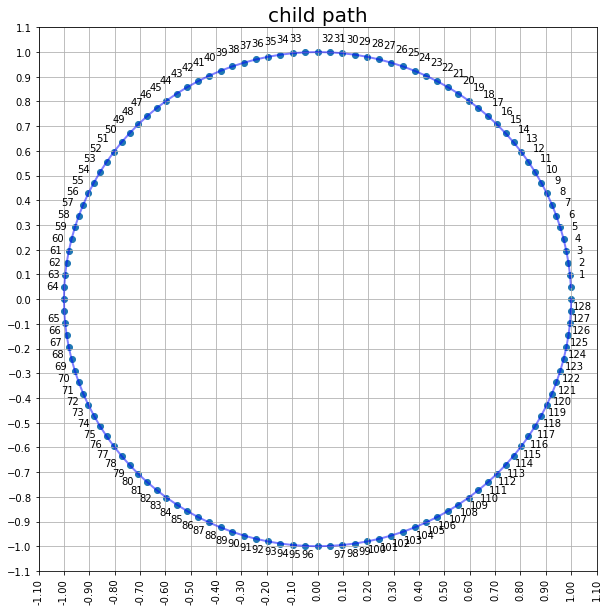

In [ ]:
print_path_ex( child_path, stations_coord, dict_labels_nodes,h=10,l=10, Dlab = 10, Slab = 10, name = "child path")